GitHub Dataset

1.数据摘要和可视化

In [2]:

import numpy as np 
import pandas as pd
github_data = pd.read_csv('github_dataset.csv')
github_data.columns

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

In [3]:
github_data.head()

repositories  stars_count  forks_count  issues_count  \
0        octocat/Hello-World            0            0           612   
1  EddieHubCommunity/support          271          150           536   
2             ethereum/aleth            0            0           313   
3      localstack/localstack            0            0           290   
4        education/classroom            0          589           202   

   pull_requests  contributors language  
0            316             2      NaN  
1              6            71      NaN  
2             27           154      C++  
3             30           434   Python  
4             22            67     Ruby

标称数据

In [4]:
github_data['repositories'].value_counts()

repositories
kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: count, Length: 972, dtype: int64

In [5]:
github_data['language'].value_counts()

language
JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionS

数值数据

In [6]:
numeric_github_data = pd.DataFrame(github_data, columns=['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors'])
numeric_github_data.head()

stars_count  forks_count  issues_count  pull_requests  contributors
0            0            0           612            316             2
1          271          150           536              6            71
2            0            0           313             27           154
3            0            0           290             30           434
4            0          589           202             22            67

In [7]:
github_data['stars_count'].describe()

count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64

In [8]:
numeric_describe = numeric_github_data.describe()
numeric_describe

stars_count  forks_count  issues_count  pull_requests  contributors
count  1052.000000  1052.000000   1052.000000    1052.000000   1052.000000
mean     81.976236    53.884981      8.656844       4.374525      8.364068
std     170.403116   127.699729     32.445154      27.913732     37.511807
min       0.000000     0.000000      1.000000       0.000000      0.000000
25%       1.000000     1.000000      1.000000       0.000000      0.000000
50%      12.000000     6.000000      2.000000       0.000000      2.000000
75%      65.250000    38.250000      6.000000       2.000000      4.000000
max     995.000000   973.000000    612.000000     567.000000    658.000000

五数概括

In [9]:
numeric_describe.loc[['mean', '25%', '50%', '75%', 'max']]

stars_count  forks_count  issues_count  pull_requests  contributors
mean    81.976236    53.884981      8.656844       4.374525      8.364068
25%      1.000000     1.000000      1.000000       0.000000      0.000000
50%     12.000000     6.000000      2.000000       0.000000      2.000000
75%     65.250000    38.250000      6.000000       2.000000      4.000000
max    995.000000   973.000000    612.000000     567.000000    658.000000

缺失值

In [10]:
NaN_counts = github_data.isna().sum()
NaN_counts = pd.DataFrame(NaN_counts, columns=['NaN_counts']).T
NaN_counts

repositories  stars_count  forks_count  issues_count  \
NaN_counts             0            0            0             0   

            pull_requests  contributors  language  
NaN_counts              0             0       145

可视化分析

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
repo_counts = pd.DataFrame(github_data['repositories'].value_counts())
repo_counts

count
repositories                                     
kameshsampath/ansible-role-rosa-demos           2
aloisdeniel/bluff                               2
antoniaandreou/github-slideshow                 2
jgthms/bulma-start                              2
artkirienko/hlds-docker-dproto                  2
...                                           ...
WhiteHouse/CIOmanagement                        1
0xCaso/defillama-telegram-bot                   1
ethereum/blake2b-py                             1
openfoodfacts/folksonomy_mobile_experiment      1
gamemann/All_PropHealth                         1

[972 rows x 1 columns]

In [18]:
language_counts = pd.DataFrame(github_data['language'].value_counts()).sort_values(by='count', ascending=True).rename(columns={'count': 'language_count'})
language_counts

language_count
language                        
SourcePawn                     1
Gherkin                        1
QMake                          1
Oz                             1
Cuda                           1
QML                            1
ActionScript                   1
CMake                          1
HCL                            1
Roff                           1
Svelte                         1
Less                           1
Haskell                        1
Smarty                         1
PureBasic                      1
R                              1
Elixir                         2
Vim Script                     2
Assembly                       2
PowerShell                     2
CodeQL                         2
Pawn                           2
Hack                           2
Vue                            2
AutoHotkey                     3
Solidity                       3
Perl                           3
CoffeeScript                   3
Dockerfile                     3
SCSS                           4
Jinja                          5
Makefile                       6
Kotlin                         7
Objective-C                    8
C#                             8
Swift                         10
Rust                          10
Go                            15
PHP                           16
Shell                         25
C                             26
Ruby                          28
Jupyter Notebook              29
C++                           29
Dart                          36
TypeScript                    37
CSS                           37
Java                          44
HTML                          72
Python                       155
JavaScript                   253

<BarContainer object of 51 artists>

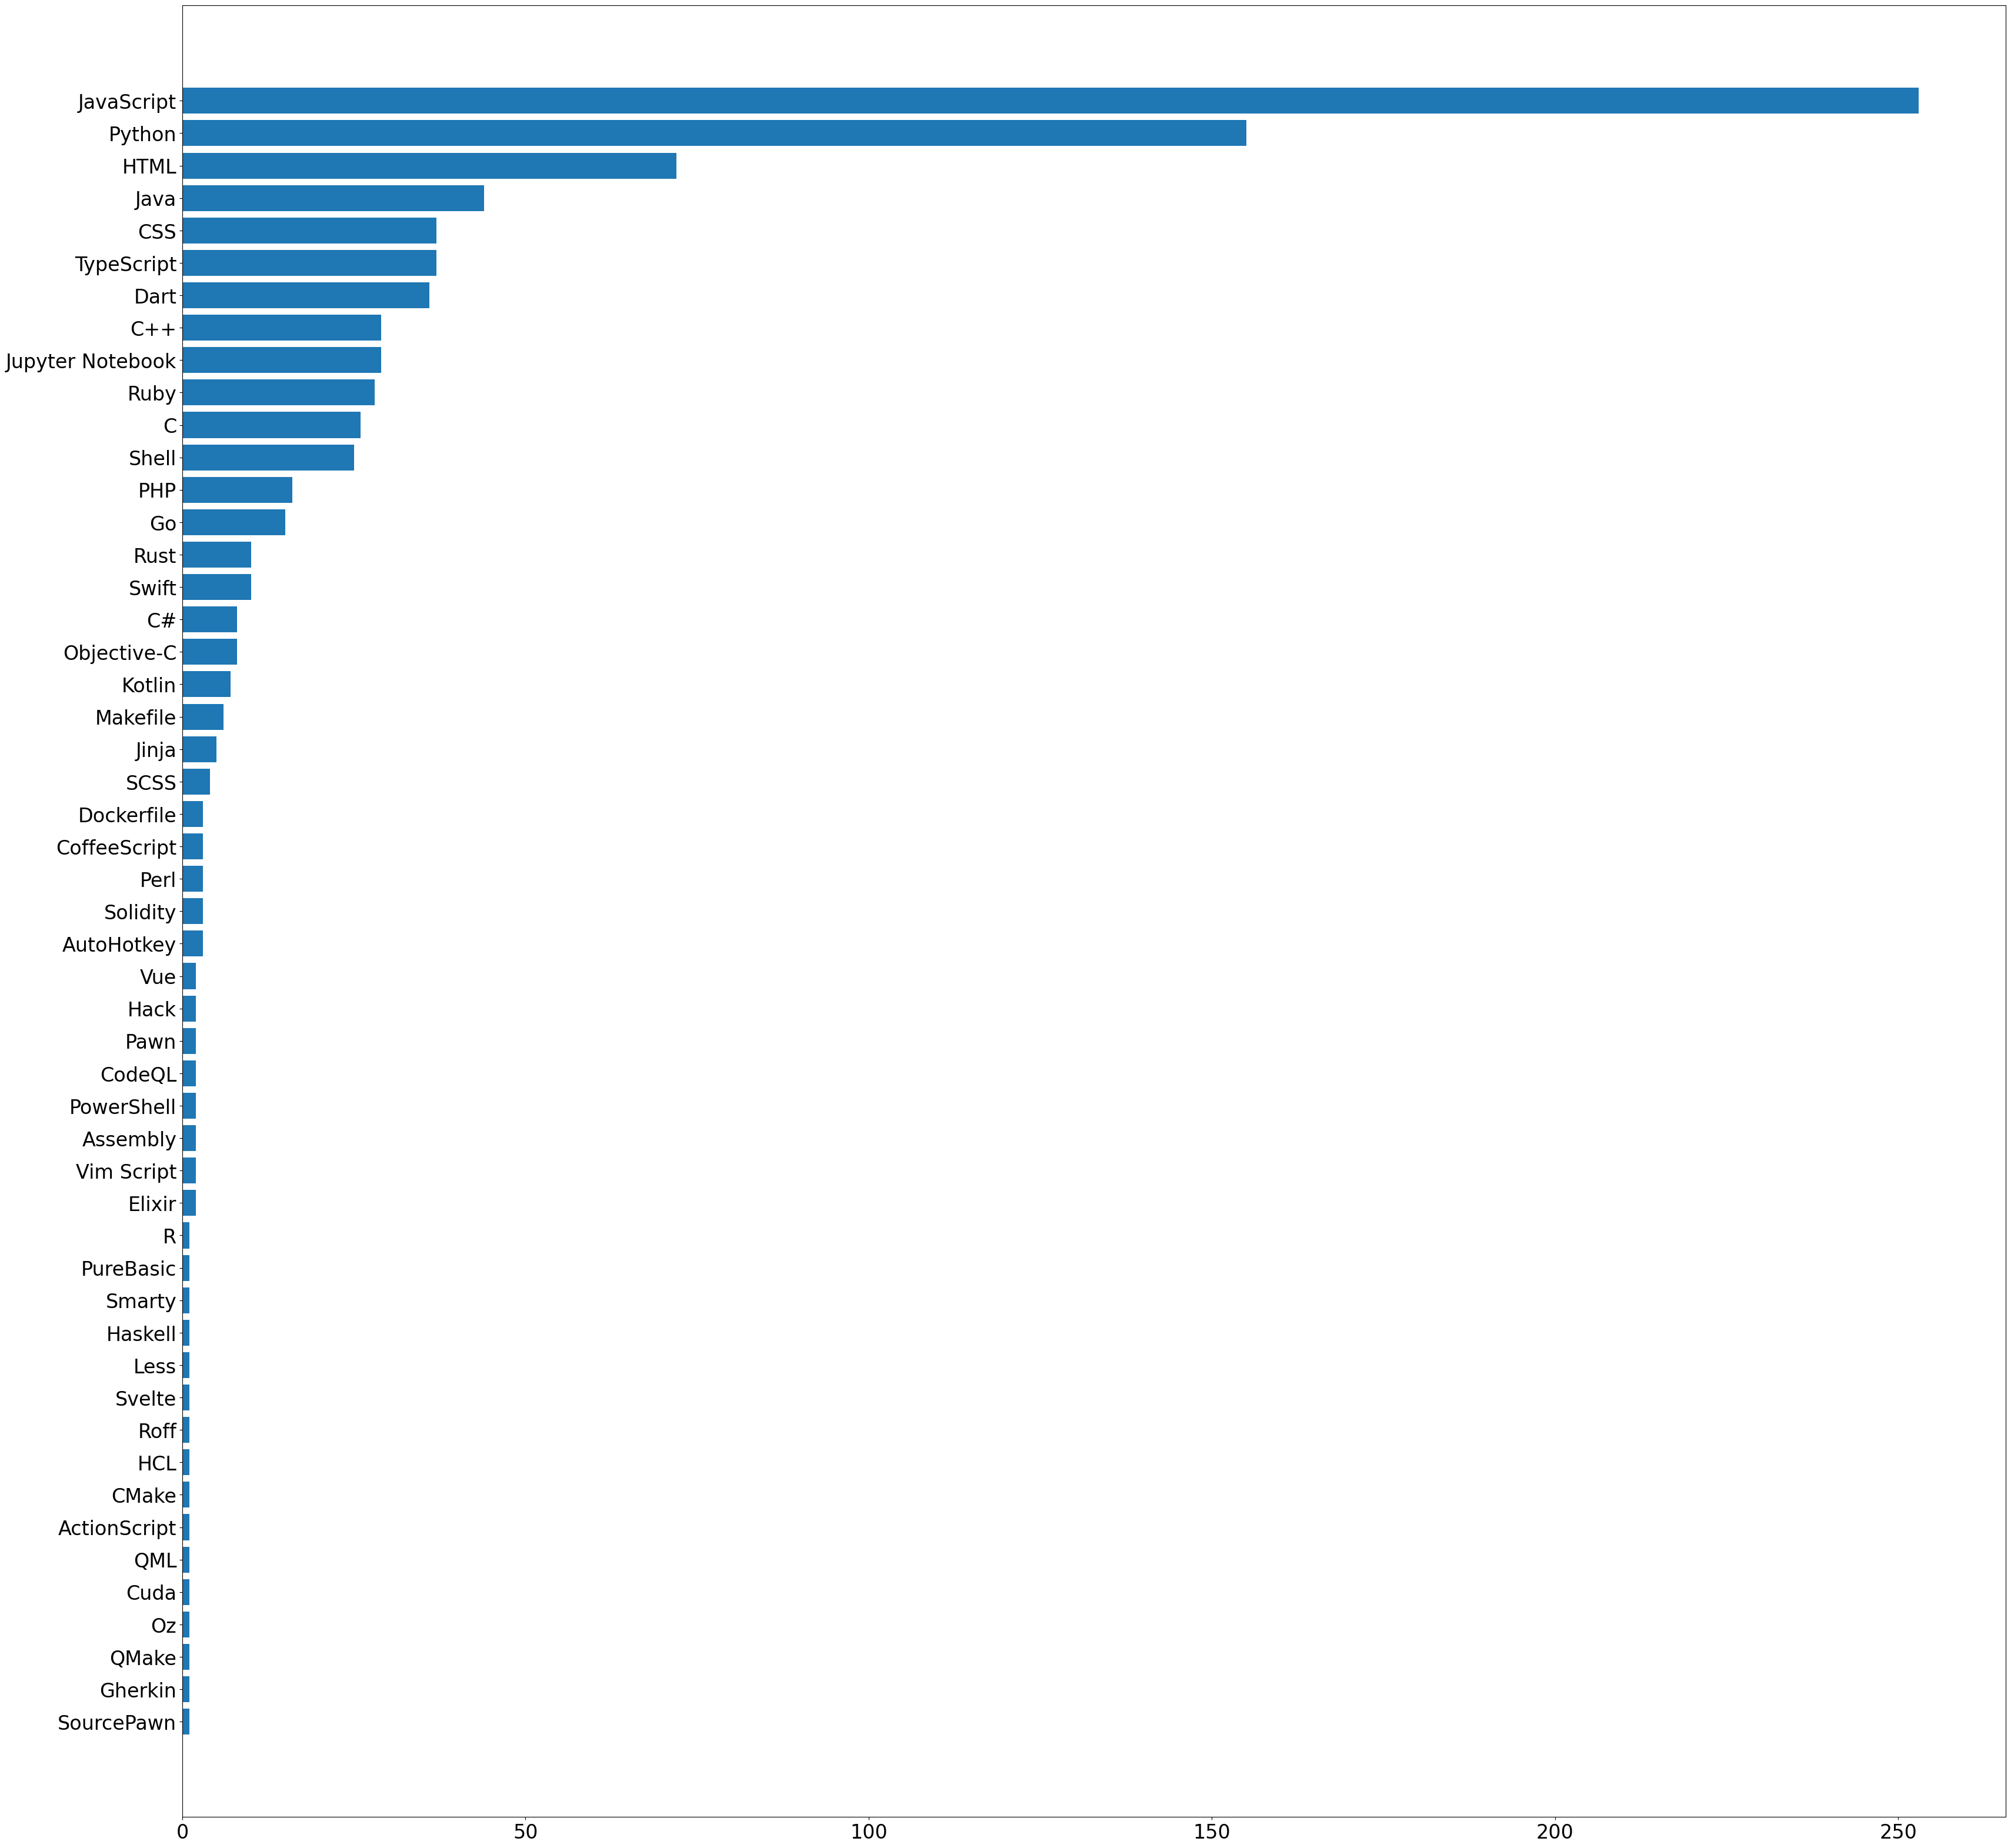

In [19]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=language_counts['language_count'])

In [20]:
language_list = [np.nan]
encode_language_list = []
nan = np.nan
for language in github_data['language']:
    if language not in language_list:
        language_list.append(language)
    language = language_list.index(language)
encode_language_list.append(language)
print(language_list)
print(len(language_list))

[nan, 'C++', 'Python', 'Ruby', 'Java', 'CSS', 'Jinja', 'Dart', 'JavaScript', 'HTML', 'Objective-C', 'Kotlin', 'AutoHotkey', 'Go', 'Haskell', 'SCSS', 'Jupyter Notebook', 'Vue', 'Shell', 'Rust', 'PowerShell', 'C', 'C#', 'TypeScript', 'Svelte', 'Less', 'QML', 'CoffeeScript', 'Swift', 'Hack', 'PHP', 'Smarty', 'Solidity', 'Dockerfile', 'PureBasic', 'Vim Script', 'R', 'HCL', 'Perl', 'Makefile', 'Roff', 'ActionScript', 'CodeQL', 'Elixir', 'Oz', 'CMake', 'Assembly', 'Pawn', 'Gherkin', 'QMake', 'Cuda', 'SourcePawn']
52


C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\3863203581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket')


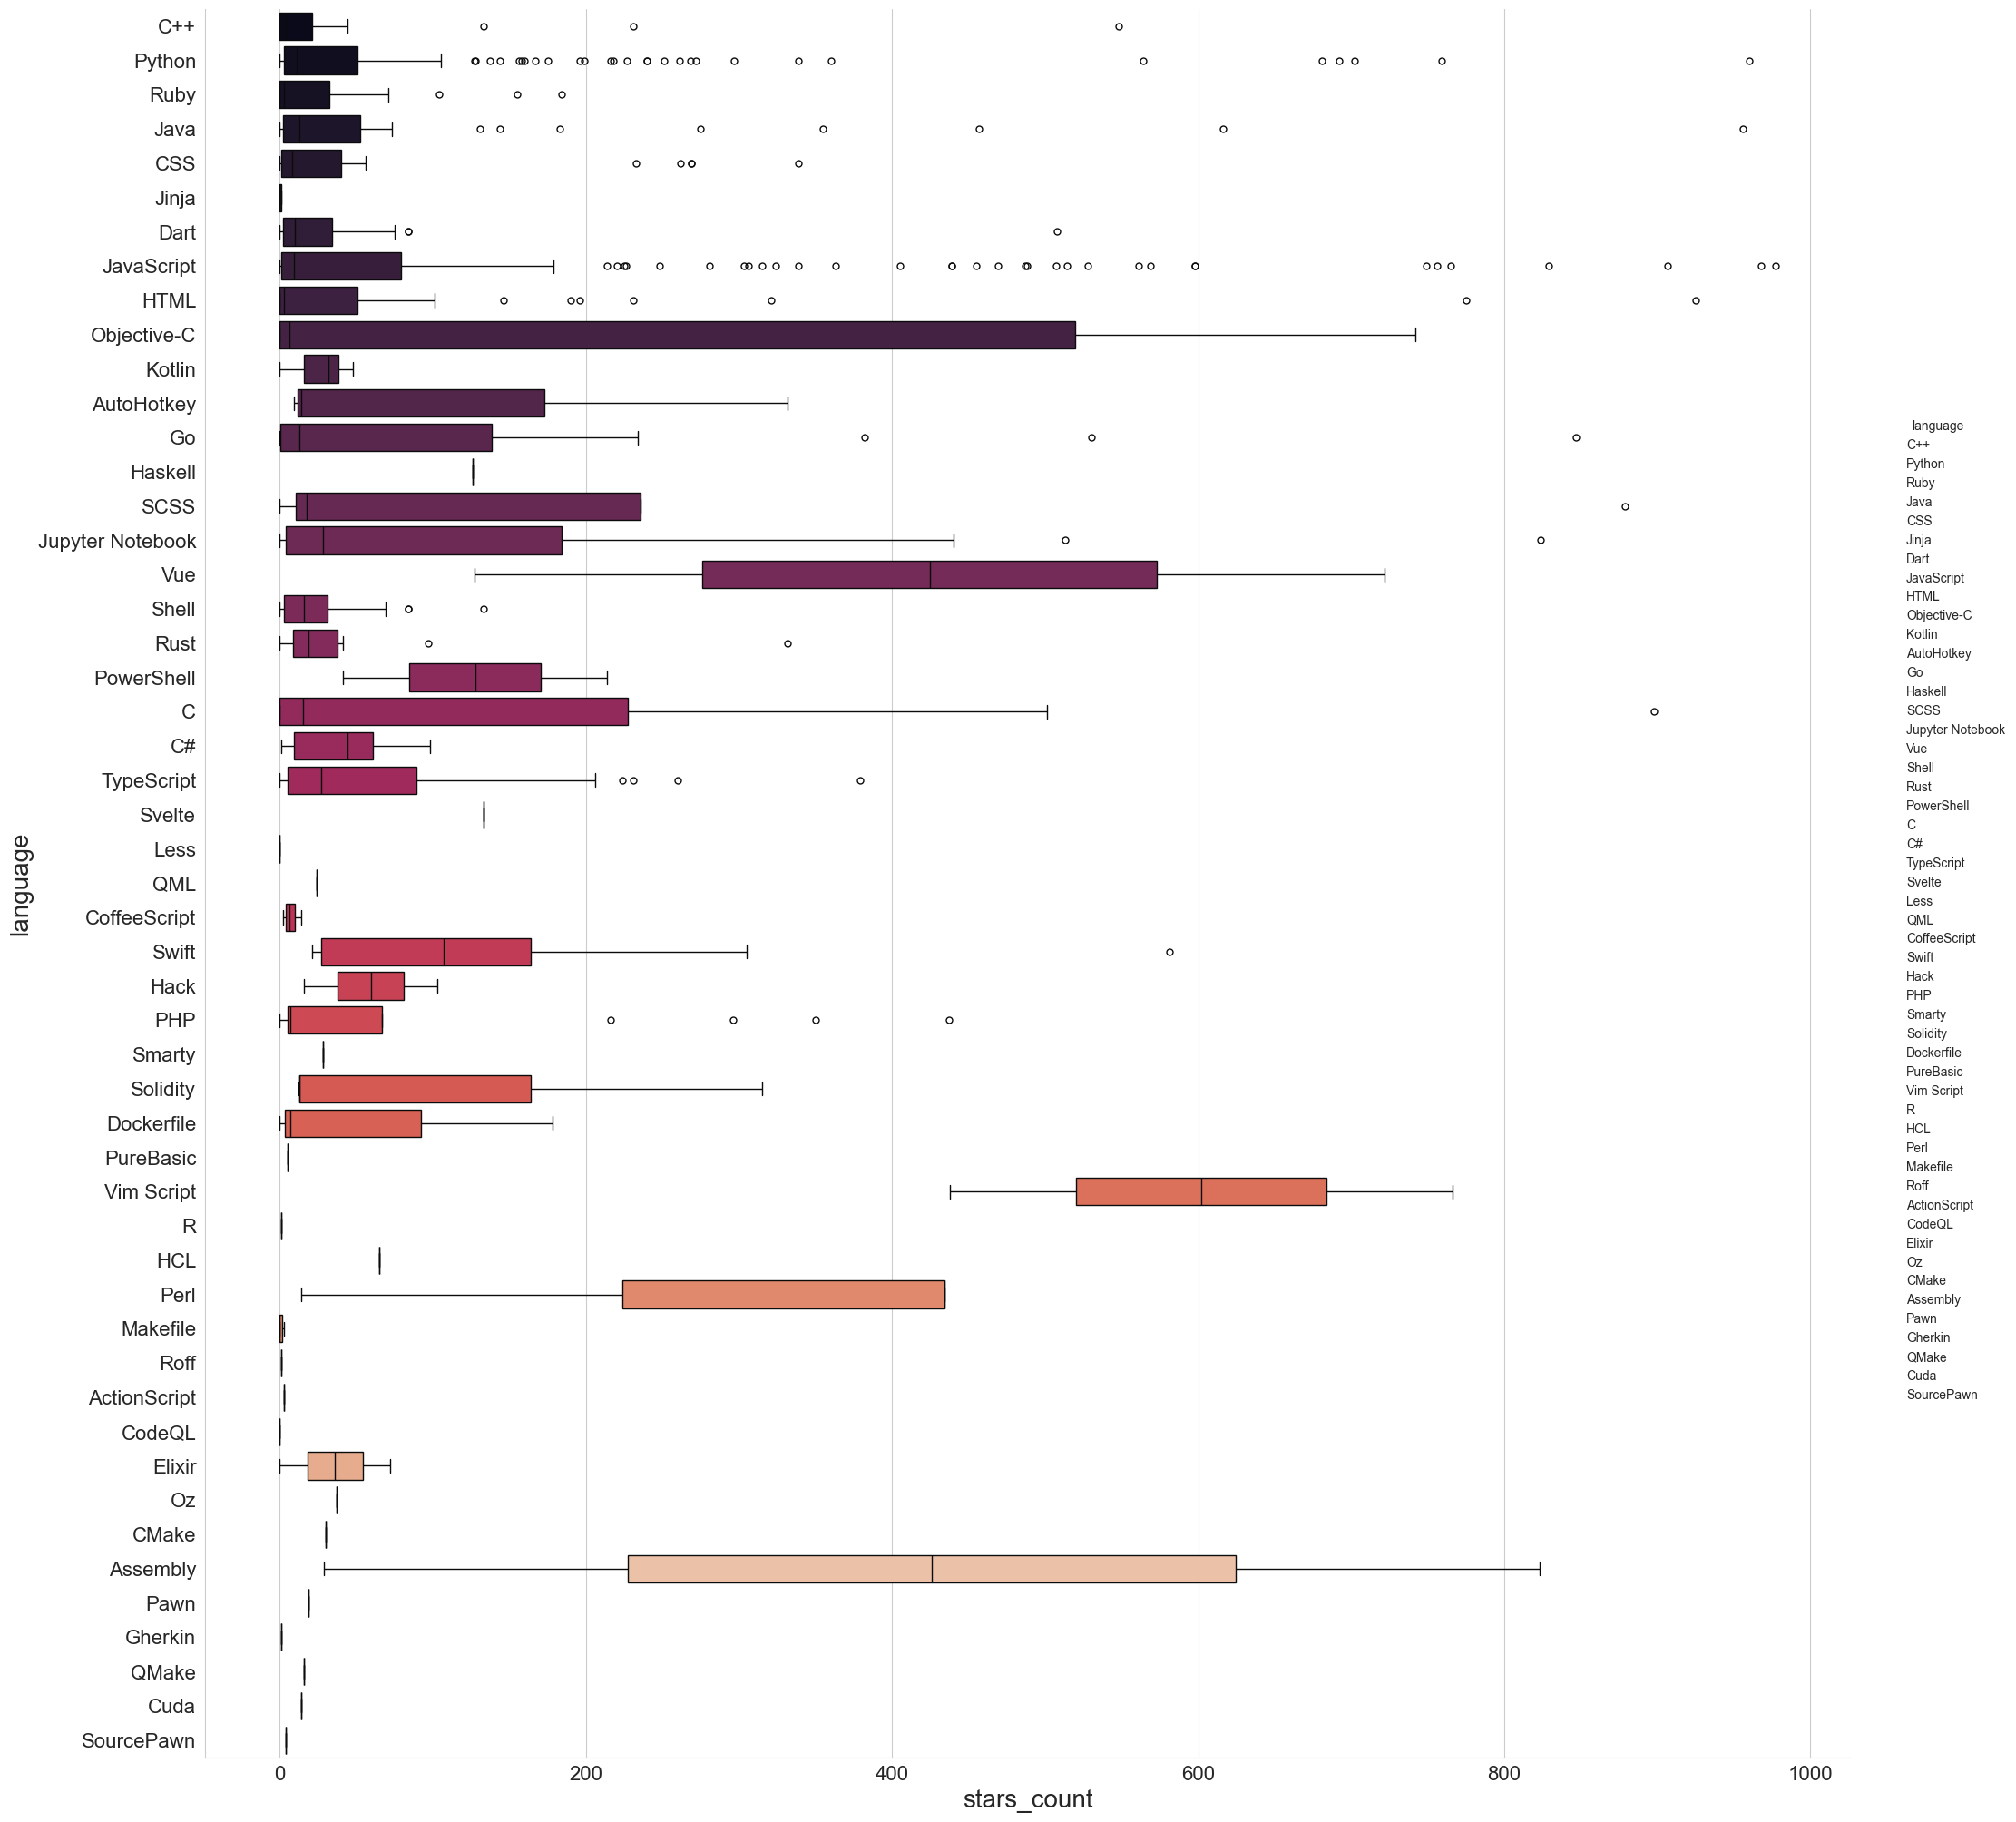

In [22]:
sns.set_style("whitegrid")
stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('stars_count', fontsize=20)
plt.show()

In [23]:
sns.set_style("whitegrid")
forks_count_box = sns.catplot(data=github_data, kind='box', y='language', x='forks_count', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('folks_count', fontsize=20)
plt.show()

C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\1223846846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  forks_count_box = sns.catplot(data=github_data, kind='box', y='language', x='forks_count', height=20, palette='rocket')


C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\1252078180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  issues_count_box = sns.catplot(data=github_data, kind='box', y='language', x='issues_count', height=20, palette='rocket')


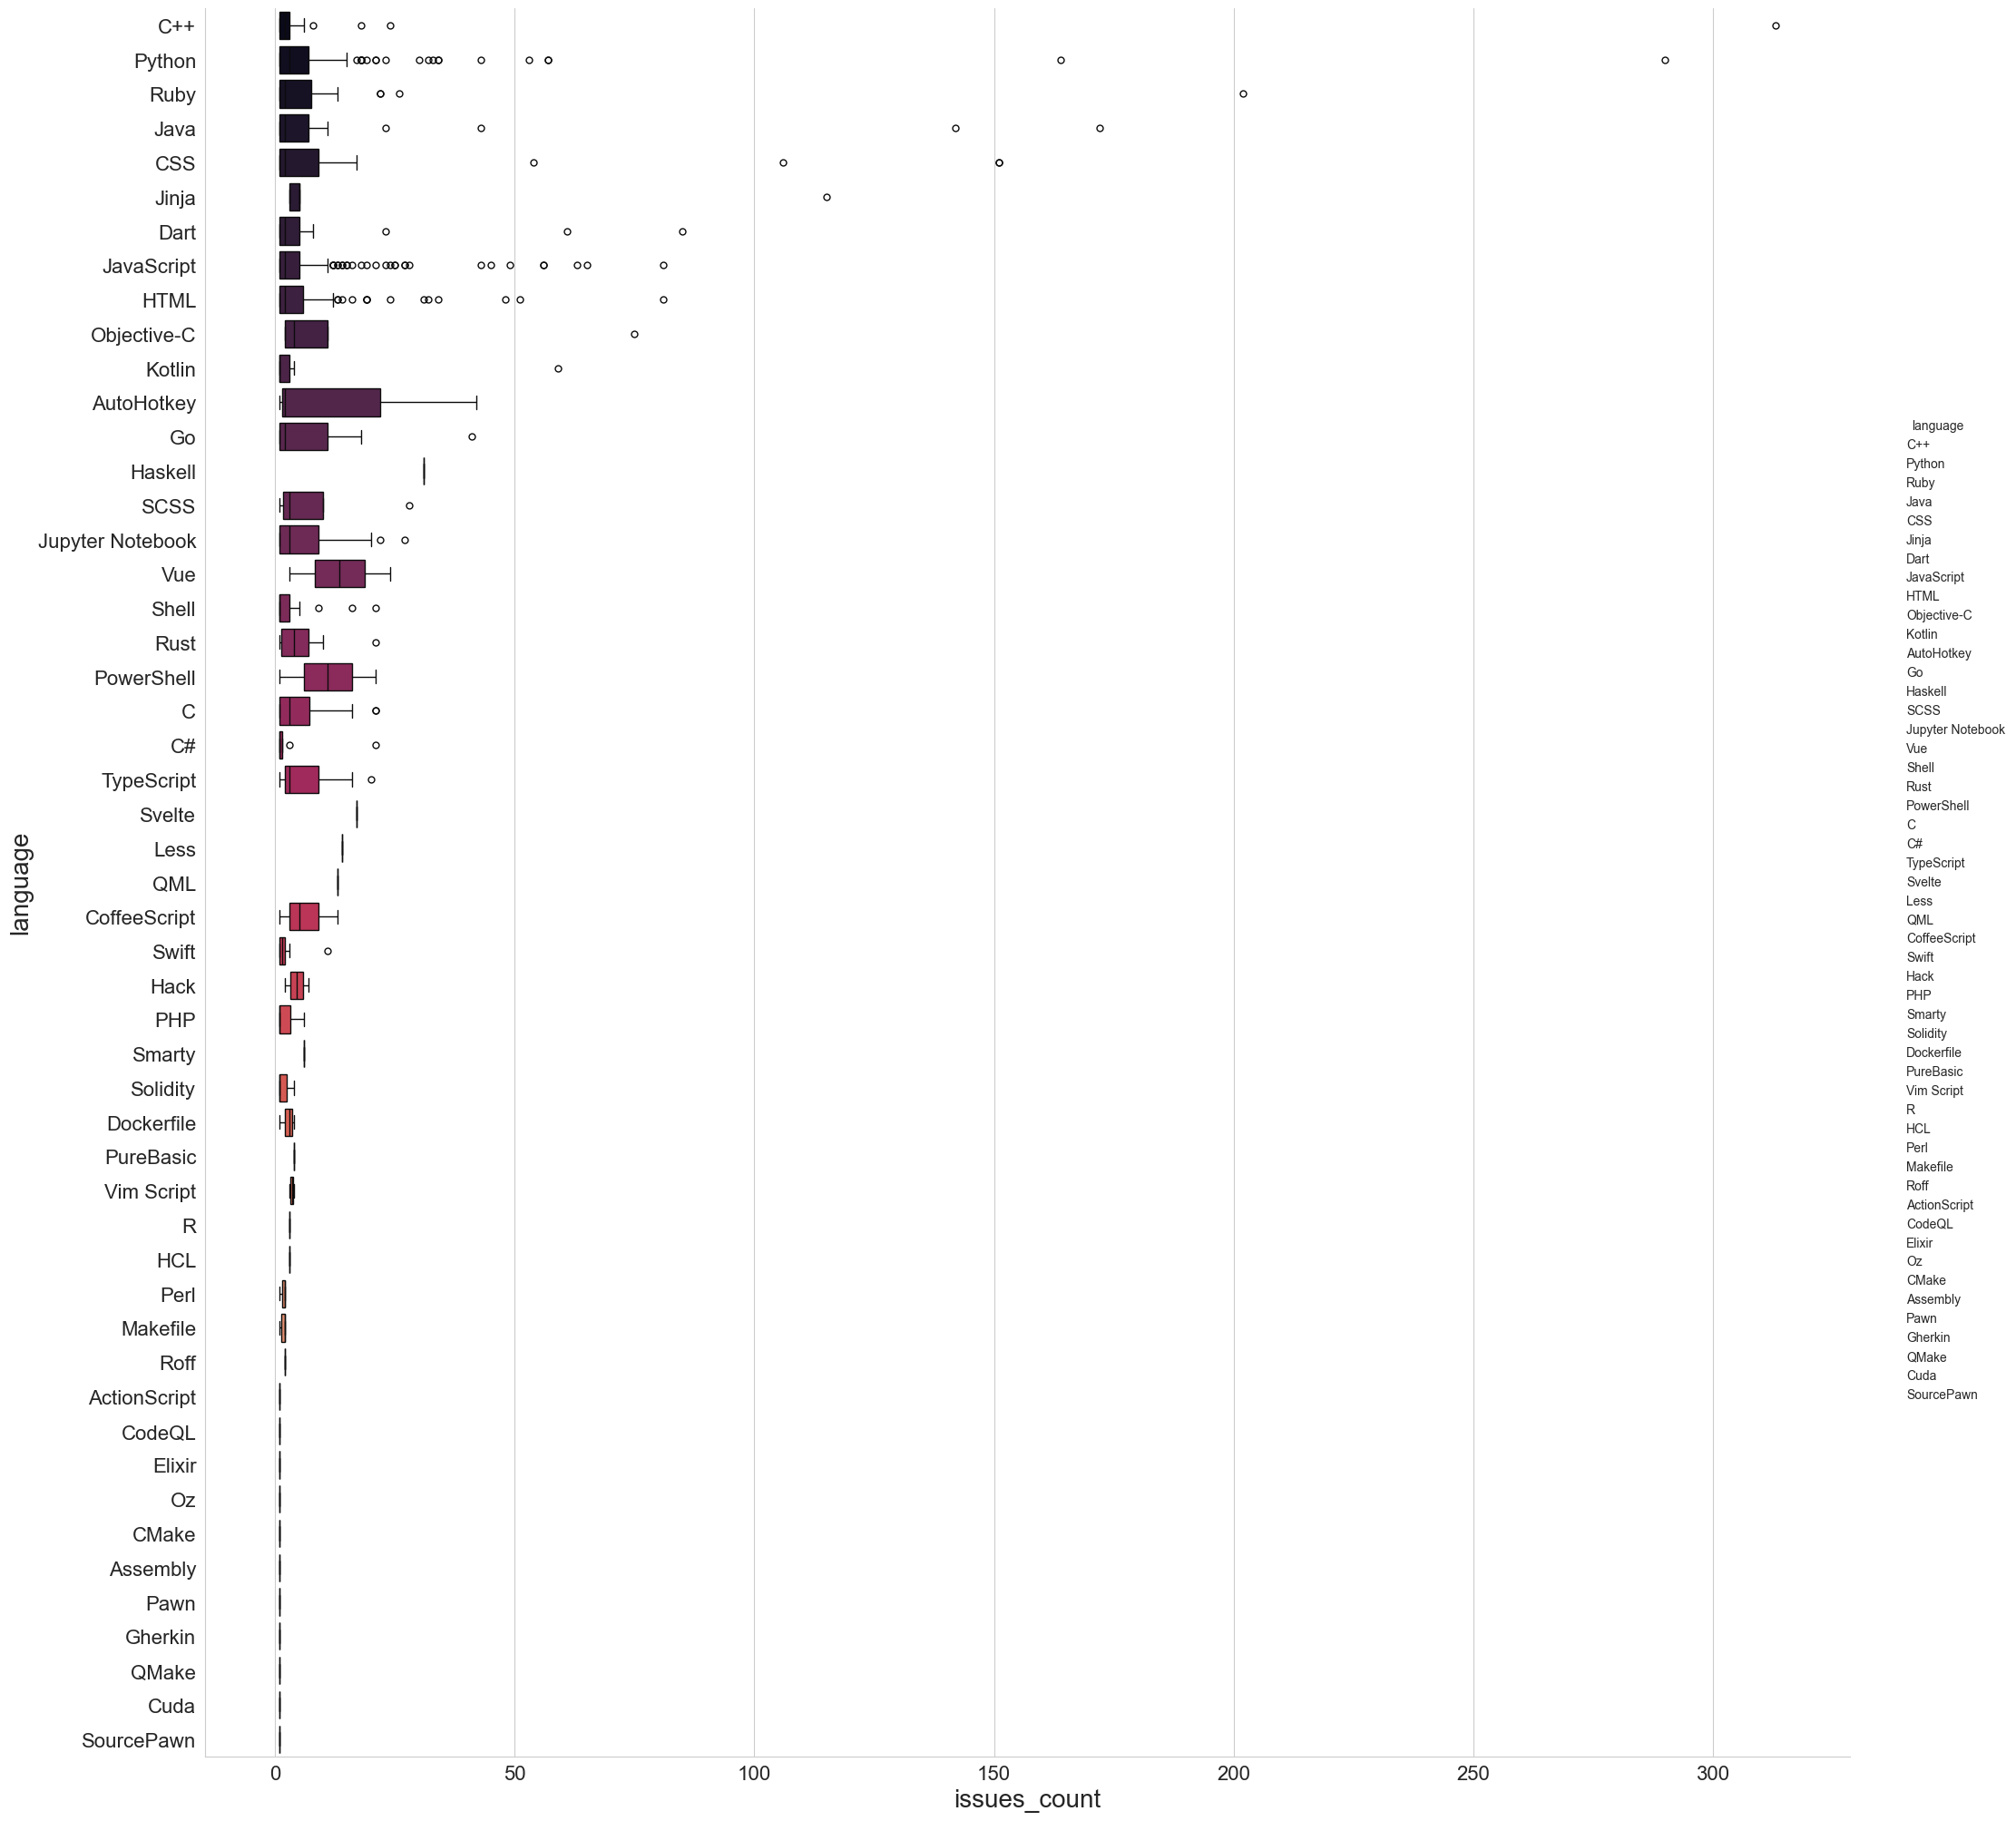

In [24]:
sns.set_style("whitegrid")
issues_count_box = sns.catplot(data=github_data, kind='box', y='language', x='issues_count', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('issues_count', fontsize=20)
plt.show()

C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\3308795274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  pull_requests_box = sns.catplot(data=github_data, kind='box', y='language', x='pull_requests', height=20, palette='rocket')


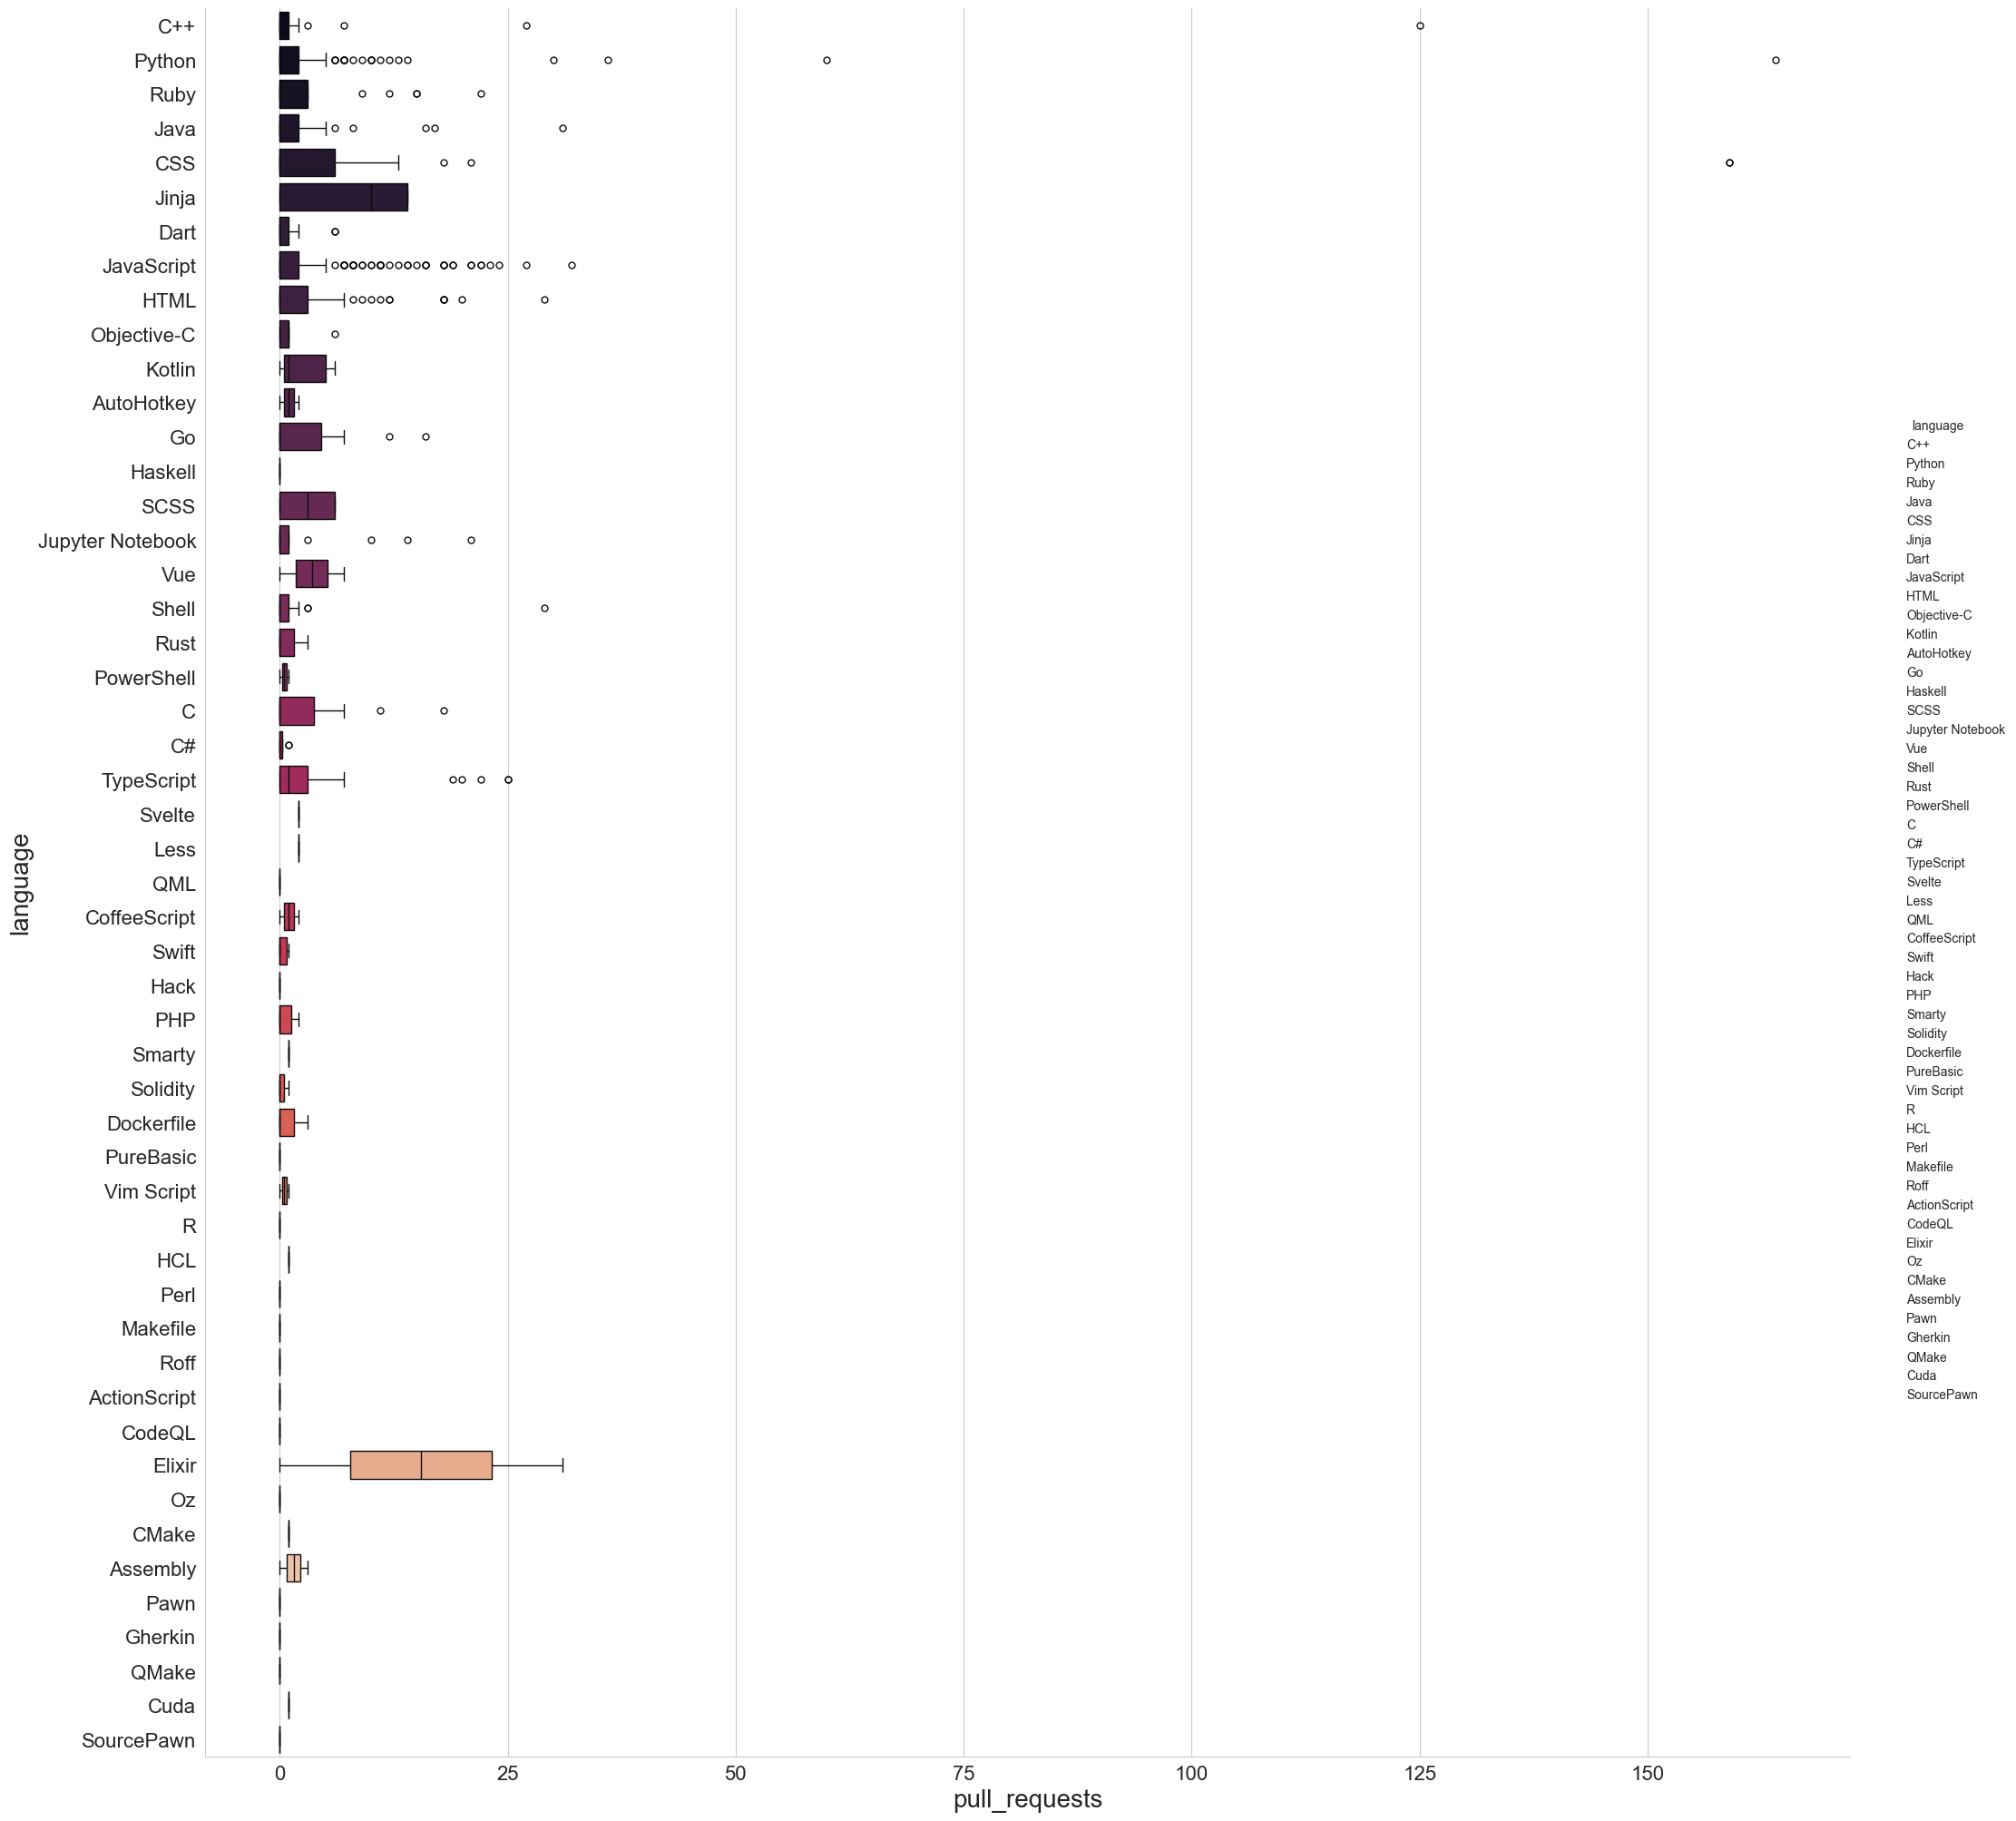

In [25]:
sns.set_style("whitegrid")
pull_requests_box = sns.catplot(data=github_data, kind='box', y='language', x='pull_requests', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('pull_requests', fontsize=20)
plt.show()

In [26]:
sns.set_style("whitegrid")
contributors_box = sns.catplot(data=github_data, kind='box', y='language', x='contributors', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('language', fontsize=20, )
plt.xlabel('contributors', fontsize=20)
plt.show()

C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\224307672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  contributors_box = sns.catplot(data=github_data, kind='box', y='language', x='contributors', height=20, palette='rocket')


In [27]:
operation_counts = pd.DataFrame(list(github_data['stars_count']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'stars_count'
operation_counts

operation  counts
0     stars_count       0
1     stars_count     271
2     stars_count       0
3     stars_count       0
4     stars_count       0
...           ...     ...
1047  stars_count       2
1048  stars_count       0
1049  stars_count       0
1050  stars_count      11
1051  stars_count       4

[1052 rows x 2 columns]

数据缺失的处理

In [36]:
from numpy import nan as NA

1.将缺失部分剔除

In [29]:
github_data.isnull()

repositories  stars_count  forks_count  issues_count  pull_requests  \
0            False        False        False         False          False   
1            False        False        False         False          False   
2            False        False        False         False          False   
3            False        False        False         False          False   
4            False        False        False         False          False   
...            ...          ...          ...           ...            ...   
1047         False        False        False         False          False   
1048         False        False        False         False          False   
1049         False        False        False         False          False   
1050         False        False        False         False          False   
1051         False        False        False         False          False   

      contributors  language  
0            False      True  
1            False      True  
2            False     False  
3            False     False  
4            False     False  
...            ...       ...  
1047         False     False  
1048         False     False  
1049         False     False  
1050         False     False  
1051         False     False  

[1052 rows x 7 columns]

In [30]:
github_data_cleaned = github_data.dropna()
github_data_cleaned

repositories  stars_count  forks_count  \
2                           ethereum/aleth            0            0   
3                    localstack/localstack            0            0   
4                      education/classroom            0          589   
5                shobhit97/open-gpstracker            0            0   
6         donnemartin/system-design-primer            0            0   
...                                    ...          ...          ...   
1047              Tyriar/canvas-astar.dart            2            1   
1048      ankitkumar70777/github-slideshow            0            0   
1049  aitikgupta/interactive_cpu_scheduler            0            5   
1050                gwmccubbin/voting_dapp           11            5   
1051               gamemann/All_PropHealth            4            3   

      issues_count  pull_requests  contributors    language  
2              313             27           154         C++  
3              290             30           434      Python  
4              202             22            67        Ruby  
5              172              0             3        Java  
6              164            164           115      Python  
...            ...            ...           ...         ...  
1047             1              0             0        Dart  
1048             1              0             8        HTML  
1049             1              1             7      Python  
1050             1              0             0  JavaScript  
1051             1              0             0  SourcePawn  

[907 rows x 7 columns]

2.用最高频率值来填补缺失值

In [31]:
language_HF = language_counts.index[-1]
github_data_HF_replaced = github_data.replace(np.nan, language_HF)
github_data_HF_replaced

repositories  stars_count  forks_count  \
0                      octocat/Hello-World            0            0   
1                EddieHubCommunity/support          271          150   
2                           ethereum/aleth            0            0   
3                    localstack/localstack            0            0   
4                      education/classroom            0          589   
...                                    ...          ...          ...   
1047              Tyriar/canvas-astar.dart            2            1   
1048      ankitkumar70777/github-slideshow            0            0   
1049  aitikgupta/interactive_cpu_scheduler            0            5   
1050                gwmccubbin/voting_dapp           11            5   
1051               gamemann/All_PropHealth            4            3   

      issues_count  pull_requests  contributors    language  
0              612            316             2  JavaScript  
1              536              6            71  JavaScript  
2              313             27           154         C++  
3              290             30           434      Python  
4              202             22            67        Ruby  
...            ...            ...           ...         ...  
1047             1              0             0        Dart  
1048             1              0             8        HTML  
1049             1              1             7      Python  
1050             1              0             0  JavaScript  
1051             1              0             0  SourcePawn  

[1052 rows x 7 columns]

3.通过属性的相关关系来填补缺失值

In [32]:
df_coded = pd.get_dummies(github_data, columns=['language'], dummy_na=True, drop_first=True)

In [34]:
github_data_attr_corr = github_data
df1 = github_data_attr_corr.groupby('language').agg(avg=('stars_count', 'mean'))

In [37]:
for i in range(len(github_data_attr_corr)):
    if github_data_attr_corr['language'].iloc[i] is NA:
        rate = github_data_attr_corr['stars_count'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        github_data_attr_corr['language'].iloc[i] = df1.index[idx]
github_data_attr_corr['language'].value_counts()

C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\470285478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  github_data_attr_corr['language'].iloc[i] = df1.index[idx]
C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\470285478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  github_data_attr_corr['language'].iloc[i] = df1.index[idx]
C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\470285478.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

language
JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir 

In [38]:
language_count_attr_corr = language_counts
language_count_attr_corr['language_count_attr_corr'] = [0] * len(language_counts)

for level in list(language_counts.index):
    if level in list(github_data_attr_corr['language'].value_counts().index):
        language_count_attr_corr.loc[[level], ['language_count_attr_corr']] = github_data_attr_corr['language'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(language_count_attr_corr))), tick_label=language_count_attr_corr.index, width=language_count_attr_corr['language_count'], label='language_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(language_count_attr_corr)))], tick_label=language_count_attr_corr.index, width=language_count_attr_corr['language_count_attr_corr'], label='language_count_attr_corr', height=0.4)
plt.ylabel('language', fontsize=24)
plt.xlabel('', fontsize=24)
# plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

4.通过数据对象之间的相似性来填补缺失值

In [39]:
github_data_sample_corr = github_data

In [40]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df
normal_github_data = regularit(github_data_sample_corr)
normal_github_data

stars_count  forks_count  issues_count  pull_requests  contributors
0       -0.000000    -0.000000           inf      -1.258964     -0.003049
1       -0.374309    -0.182260     -7.039474      -0.010695     -0.120954
2       -0.000000    -0.000000     -1.043478      -0.050000     -0.305556
3       -0.000000    -0.000000     -0.897516      -0.055866     -1.937500
4       -0.000000    -1.533854     -0.490244      -0.040367     -0.113367
...           ...          ...           ...            ...           ...
1047    -0.002014    -0.001029     -0.000000      -0.000000     -0.000000
1048    -0.000000    -0.000000     -0.000000      -0.000000     -0.012308
1049    -0.000000    -0.005165     -0.000000      -0.001767     -0.010753
1050    -0.011179    -0.005165     -0.000000      -0.000000     -0.000000
1051    -0.004036    -0.003093     -0.000000      -0.000000     -0.000000

[1052 rows x 5 columns]

In [41]:
normal_language = pd.concat([normal_github_data, github_data_sample_corr['language']], axis=1)
normal_language

stars_count  forks_count  issues_count  pull_requests  contributors  \
0       -0.000000    -0.000000           inf      -1.258964     -0.003049   
1       -0.374309    -0.182260     -7.039474      -0.010695     -0.120954   
2       -0.000000    -0.000000     -1.043478      -0.050000     -0.305556   
3       -0.000000    -0.000000     -0.897516      -0.055866     -1.937500   
4       -0.000000    -1.533854     -0.490244      -0.040367     -0.113367   
...           ...          ...           ...            ...           ...   
1047    -0.002014    -0.001029     -0.000000      -0.000000     -0.000000   
1048    -0.000000    -0.000000     -0.000000      -0.000000     -0.012308   
1049    -0.000000    -0.005165     -0.000000      -0.001767     -0.010753   
1050    -0.011179    -0.005165     -0.000000      -0.000000     -0.000000   
1051    -0.004036    -0.003093     -0.000000      -0.000000     -0.000000   

        language  
0         CodeQL  
1           Perl  
2            C++  
3         Python  
4           Ruby  
...          ...  
1047        Dart  
1048        HTML  
1049      Python  
1050  JavaScript  
1051  SourcePawn  

[1052 rows x 6 columns]

In [42]:
infos = []
for i in range(len(normal_language)):
    info = []
    star = normal_language['stars_count'].iloc[i]
    fork = normal_language['forks_count'].iloc[i]
    issue = normal_language['issues_count'].iloc[i]
    pull = normal_language['pull_requests'].iloc[i]
    contributor = normal_language['contributors'].iloc[i]
    info.append(star)
    info.append(fork)
    info.append(issue)
    info.append(pull)
    info.append(contributor)
    infos.append(info)

In [43]:
for i in range(len(normal_language)):
    if normal_language['language'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        github_data_sample_corr['language'].iloc[i] = github_data_sample_corr['language'].iloc[idx]
github_data_sample_corr['language'].value_counts()

language
JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir 

Movies Dataset from Pirated Sites

数据摘要和可视化

In [48]:
mov_data = pd.read_csv('movies_dataset.csv')
mov_data.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [49]:
# 去除无关属性
mov_data = mov_data.drop(columns='Unnamed: 0')
mov_data.columns

Index(['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'id',
       'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [50]:
def dtype_uni_miss(mov_data):
    cols, dtype, specimens, num_unique, null_share = [], [], [], [], []

    for column in mov_data:
        cols.append(column)
        col_dtype = mov_data[column].dtype
        dtype.append(col_dtype)
        
        specimen = mov_data.loc[mov_data[column].first_valid_index(), column]
        specimens.append(specimen)
        
        num_unique.append(mov_data[column].nunique())
        
        null_sum = mov_data[column].isna().sum()
        null_to_len = null_sum / len(mov_data[column])
        null_share.append(f'{null_to_len:.2%}')
        
    df = pd.DataFrame(list(zip(dtype, specimens, num_unique, null_share)), index=cols)    
    df.columns=['dtype', 'eg.', 'num_unique', 'null_share']
 
    return df
dtype_uni_miss(mov_data)
for col in 'downloads', 'views':
    mov_data[col] = mov_data[col].str.replace(',','')
    mov_data[col] = mov_data[col].astype('float')

mov_data['id'] = mov_data['id'].astype('str')
dtype_uni_miss(mov_data)

dtype                                                eg.  \
IMDb-rating      float64                                                4.8   
appropriate_for   object                                                  R   
director          object                                          John Swab   
downloads        float64                                              304.0   
id                object                                             372092   
industry          object                                Hollywood / English   
language          object                                            English   
posted_date       object                                       20 Feb, 2023   
release_date      object                                        Jan 28 2023   
run_time          object                                                105   
storyline         object  Doc\r\n facilitates a fragile truce between th...   
title             object                                       Little Dixie   
views            float64                                             2794.0   
writer            object                                          John Swab   

                 num_unique null_share  
IMDb-rating              85      4.09%  
appropriate_for          21     46.12%  
director               9672      9.43%  
downloads             10625      0.00%  
id                    17086      0.00%  
industry                 10      0.00%  
language               1167      2.66%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                415      8.60%  
storyline             15748      8.28%  
title                 16572      0.00%  
views                 16821      0.00%  
writer                13603     10.67%

In [51]:
mov_data.duplicated().sum()

0

In [52]:
mov_data['id'].value_counts()

id
372090    402
371744    402
371877    402
372092    202
371991    202
         ... 
303381      1
303380      1
303379      1
303377      1
30459       1
Name: count, Length: 17086, dtype: int64

In [53]:
mov_data.groupby('id').agg(id_count=('id', 'count')).query('id_count > 1').sort_values(by='id_count', ascending=False)

id_count
id              
371744       402
371877       402
372090       402
371936       202
371740       202
...          ...
12600          2
12523          2
12522          2
12521          2
9976           2

[107 rows x 1 columns]

In [54]:
non_unique_id_mov_data = mov_data.groupby('id').agg(id_count=('id', 'count')).query('id_count > 1').sort_values(by='id_count', ascending=False).index.to_list()
mov_data.query('id in @non_unique_id_mov_data')

IMDb-rating appropriate_for          director  downloads      id  \
0              4.8               R         John Swab      304.0  372092   
3              8.1             NaN      Venky Atluri     1549.0  372090   
11             9.0             NaN      Rohit Dhawan    12954.0  372039   
14             7.1               R  Elegance Bratton      463.0  371991   
19             4.7             NaN       Sean Lahiff     1453.0  371943   
...            ...             ...               ...        ...     ...   
20542          7.2             NaN      C.V. Sridhar     2266.0   26428   
20543          NaN             NaN               NaN     1998.0   28957   
20544          7.7             NaN         Bimal Roy     6080.0   28958   
20546          NaN             NaN               NaN      309.0  371669   
20547          NaN             NaN               NaN     2613.0  371816   

                  industry       language   posted_date release_date  \
0      Hollywood / English        English  20 Feb, 2023  Jan 28 2023   
3                Tollywood          Hindi  20 Feb, 2023  Feb 17 2023   
11      Bollywood / Indian          Hindi  18 Feb, 2023  Feb 17 2023   
14     Hollywood / English        English  17 Feb, 2023  Dec 02 2022   
19     Hollywood / English        English  16 Feb, 2023  Dec 01 2022   
...                    ...            ...           ...          ...   
20542   Bollywood / Indian  Hindi,English  01 Jan, 1970  Mar 22 1968   
20543   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 13 1959   
20544   Bollywood / Indian          Hindi  01 Jan, 1970  May 13 1955   
20546            Wrestling        English  10 Feb, 2023  Feb 09 2023   
20547            Wrestling        English  14 Feb, 2023  Feb 13 2023   

       run_time                                          storyline  \
0           105  Doc\r\n facilitates a fragile truce between th...   
3           139  The life of a young man and his struggles agai...   
11          142  Bantu\r\n is hated by his father Valmiki since...   
14           95  A\r\n young, gay Black man, rejected by his mo...   
19           93  An\r\n aspiring documentarian and two conserva...   
...         ...                                                ...   
20542  2h 36min  Dr. Ravi returns from abroad and takes up posi...   
20543       NaN                                                NaN   
20544       159  Devdas and Parvati had been inseparable as chi...   
20546       NaN                                                NaN   
20547       NaN                                                NaN   

                       title    views  \
0               Little Dixie   2794.0   
3                     Vaathi   4878.0   
11                  Shehzada  35831.0   
14            The Inspection   5763.0   
19                  Carnifex  11626.0   
...                      ...      ...   
20542                 Saathi   5932.0   
20543             Bhai-Bahen   6219.0   
20544                 Devdas  16376.0   
20546  TNA.Impact 2023-02-09   1419.0   
20547     WWE Raw 2023-02-13   6697.0   

                                                  writer  
0                                              John Swab  
3                                           Venky Atluri  
11       Hussain Dalal, Rohit Dhawan, Trivikram Srinivas  
14                                      Elegance Bratton  
19                                        Shanti Gudgeon  
...                                                  ...  
20542                         Abrar Alvi, Raj Baldev Raj  
20543                                                NaN  
20544  Rajinder Singh Bedi, Saratchandra Chatterjee, ...  
20546                                                NaN  
20547                                                NaN  

[3569 rows x 14 columns]

In [55]:
id_count = mov_data.query('id in @non_unique_id_mov_data').groupby('id').agg(id_count=('id', 'count')).query('id_count > 1').sort_values(by='id_count', ascending=False)
id_count

id_count
id              
371744       402
371877       402
372090       402
371936       202
371740       202
...          ...
12600          2
12523          2
12522          2
12521          2
9976           2

[107 rows x 1 columns]

In [56]:
title_list = []
for id in non_unique_id_mov_data:
    title = mov_data[mov_data['id'] == id]['title'].iloc[0]
    title_list.append(title)
    # print(title)

title_data = pd.DataFrame(title_list)
title_data.value_counts()

Bodyguard                 2
A Dangerous Method        1
Spy Game                  1
The Condemned             1
The Company Men           1
                         ..
K-11                      1
Ittefaq                   1
Ishq Schoolay             1
Hum Bhi Umeed Say Hain    1
Your Place or Mine        1
Name: count, Length: 106, dtype: int64

In [57]:
mov_data[mov_data['title'] == 'Bodyguard']

IMDb-rating appropriate_for            director  downloads     id  \
17239          5.1             NaN  Gopichand Malineni    30110.0  12017   
17248          5.1             NaN  Gopichand Malineni    30110.0  12017   
18287          4.7       Not Rated            Siddique   160296.0   7048   
18290          4.7       Not Rated            Siddique   160296.0   7048   

                 industry       language   posted_date release_date run_time  \
17239           Tollywood         Telugu  25 Oct, 2012  Oct 24 2012      150   
17248           Tollywood         Telugu  25 Oct, 2012  Oct 24 2012      150   
18287  Bollywood / Indian  Hindi,English  01 Sep, 2011  Aug 31 2011      130   
18290  Bollywood / Indian  Hindi,English  01 Sep, 2011  Aug 31 2011      130   

                                               storyline      title     views  \
17239                                                NaN  Bodyguard   75070.0   
17248                                                NaN  Bodyguard   75071.0   
18287  Reading from a diary a lad comes to know about...  Bodyguard  243451.0   
18290  Reading from a diary a lad comes to know about...  Bodyguard  243452.0   

                                          writer  
17239  Siddique, Kona Venkat, Gopichand Malineni  
17248  Siddique, Kona Venkat, Gopichand Malineni  
18287     J.P. Chowksey, Kiran Kotrial, Siddique  
18290     J.P. Chowksey, Kiran Kotrial, Siddique

有些电影有着相同的名字，但实际上是不同的电影。所以按标题分组并不合适

In [61]:
id_count = pd.DataFrame(mov_data['id'].value_counts())
id_count.rename(columns={'count':'id_count'}, inplace=True)
id_count = id_count.query('id_count > 1').sort_values(by='id_count', ascending=True)
id_count

id_count
id              
9430           2
9728           2
894            2
6857           2
21422          2
...          ...
371991       202
372092       202
371877       402
371744       402
372090       402

[107 rows x 1 columns]

In [62]:
id_title_dict = {}
for id in non_unique_id_mov_data:
    title = mov_data[mov_data['id'] == id]['title'].iloc[0]
    id_title_dict[id] = title
    
title_count = id_count.query('id_count > 1').rename(index=id_title_dict)
title_count

id_count
id                                                     
Boy Wonder                                            2
Ocean's Twelve                                        2
Ishq Schoolay                                         2
Bin Bulaye Baraati                                    2
Strippers vs Werewolves                               2
...                                                 ...
The Inspection                                      202
Little Dixie                                        202
The Girl Who Escaped: The Kara Robinson Story       402
Who Invited Charlie?                                402
Vaathi                                              402

[107 rows x 1 columns]

In [63]:
title_count_list = list(title_count.index)
plt.figure(figsize=(40, 40))
plt.yticks(list(range(107)), list(title_count.index), fontsize=20)
plt.xticks(fontsize=20)
plt.barh(id_count.index, width=id_count['id_count'], height=0.4)
plt.ylabel('')
plt.xlabel('number of entries', fontsize=20)
plt.title('Movies mentioned more than once?', fontsize=25, loc='center')
plt.show()

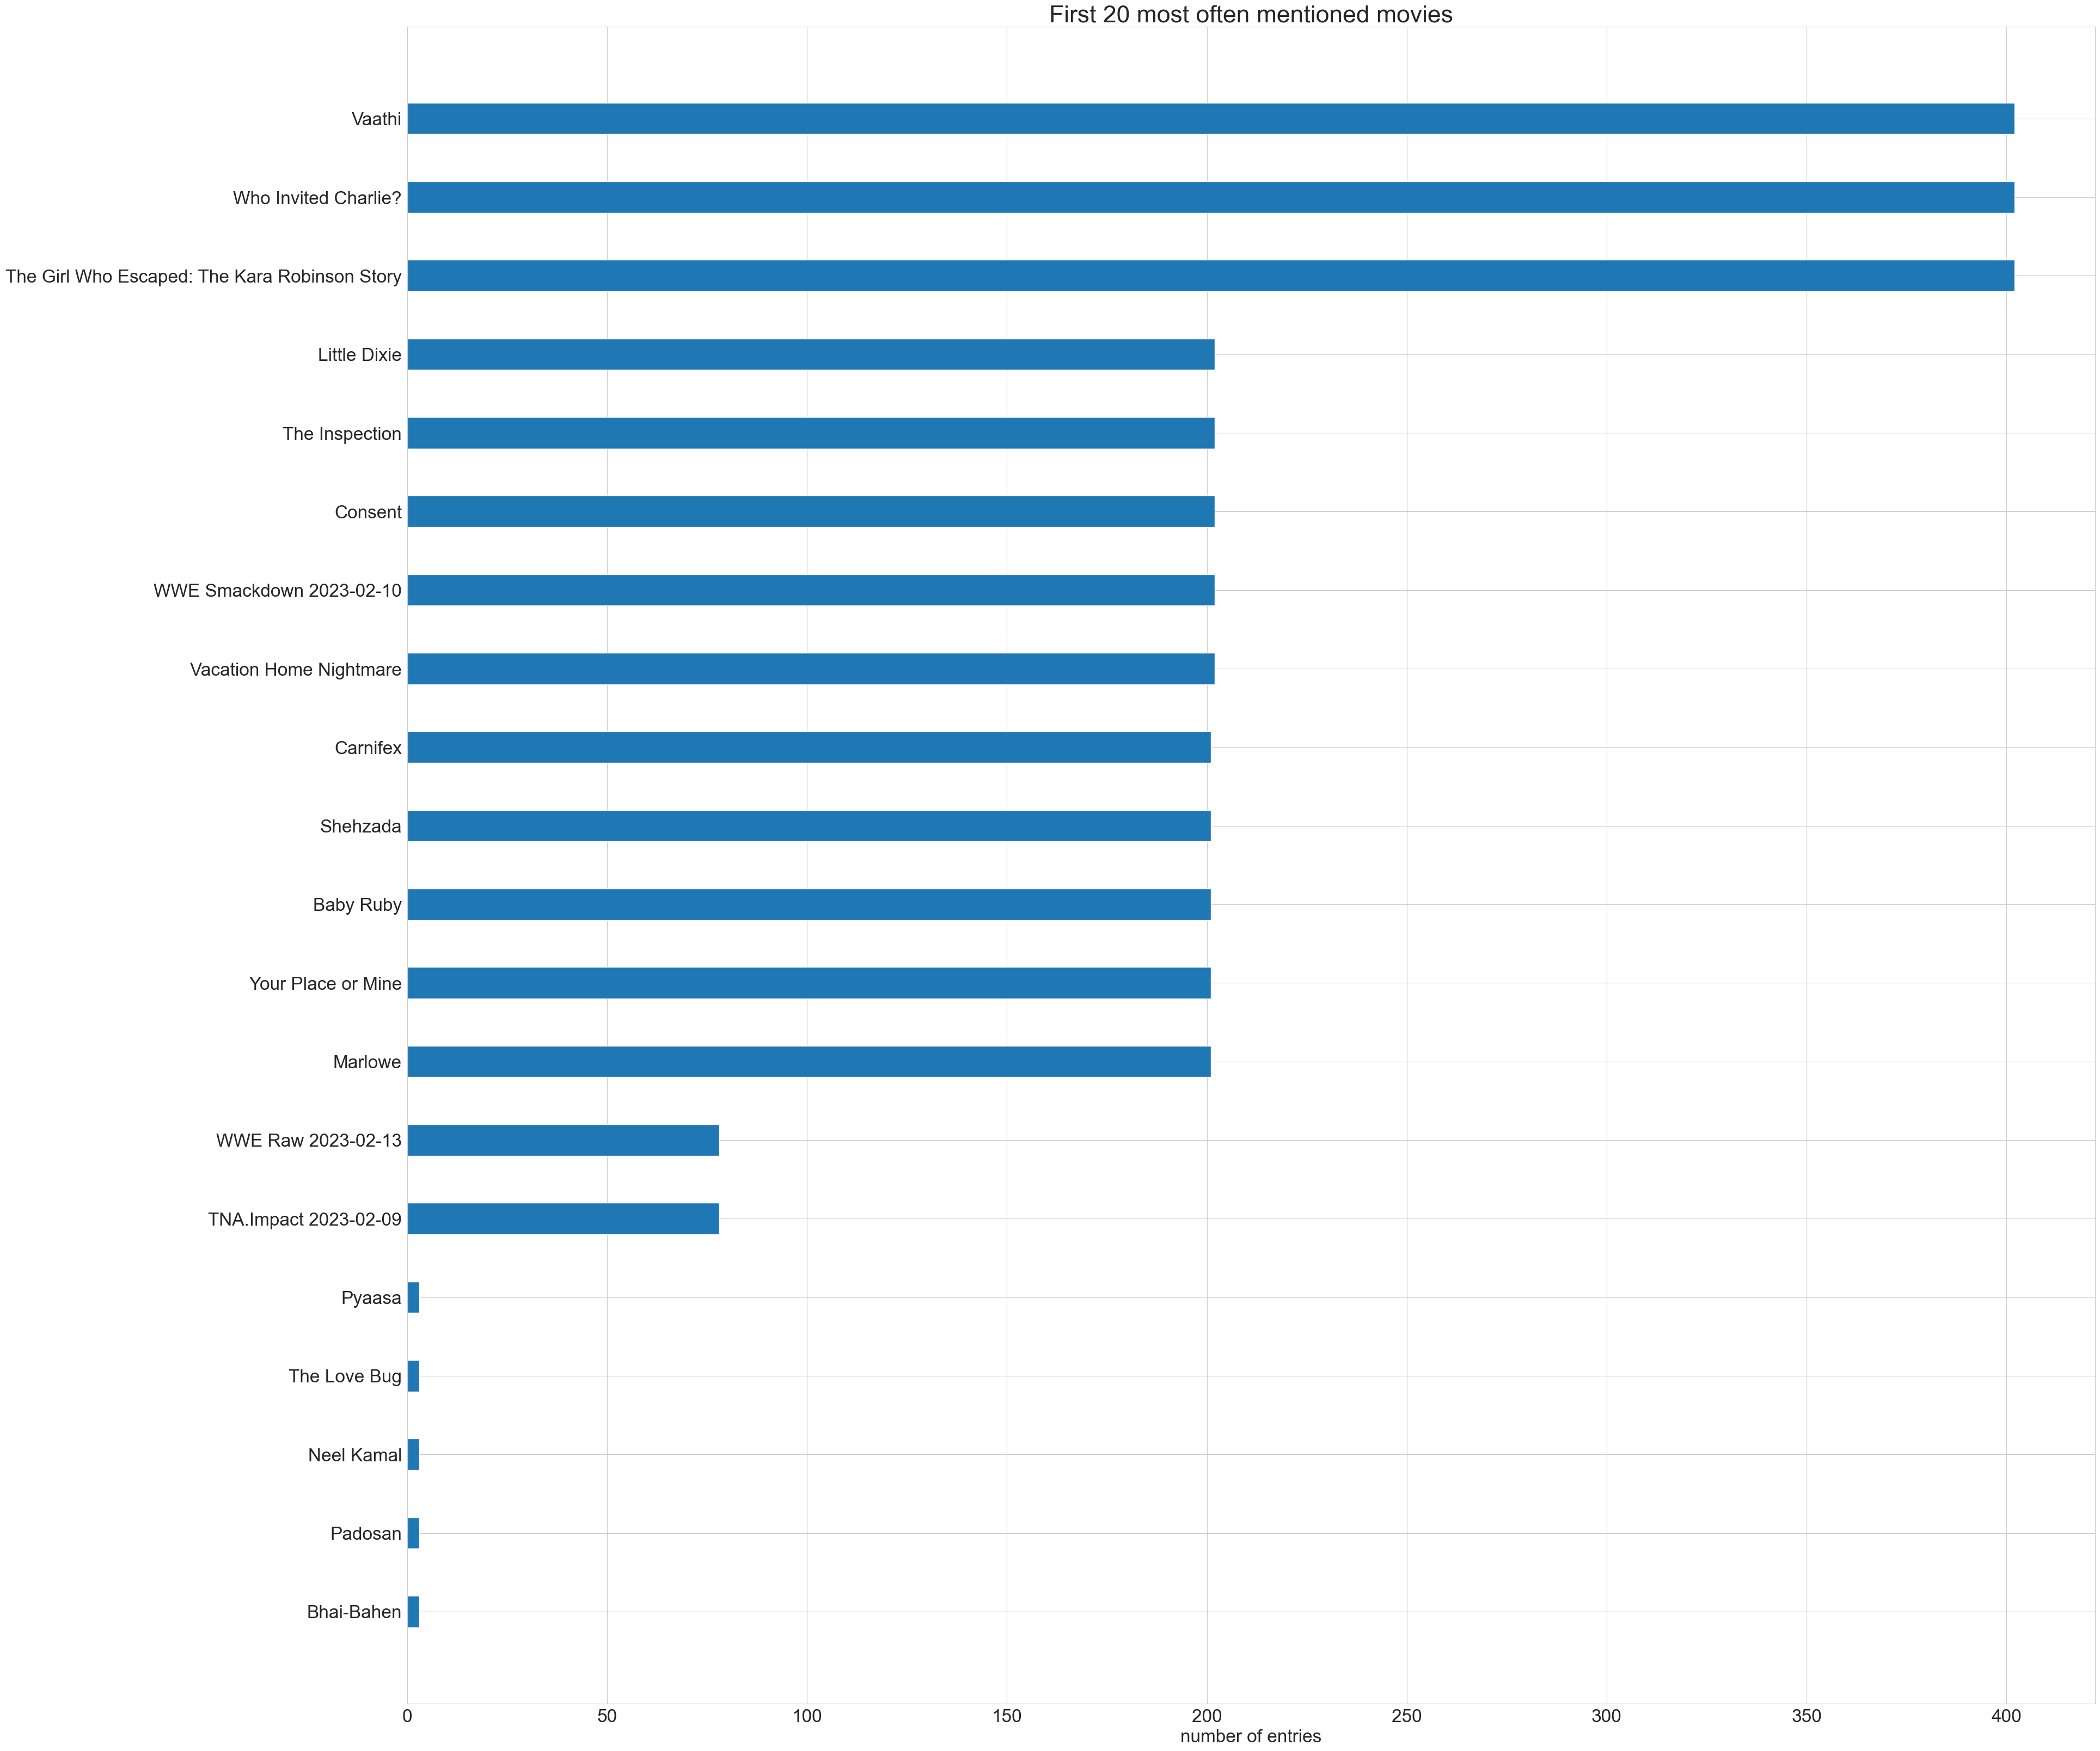

In [64]:
plt.figure(figsize=(40, 40))
plt.yticks(list(range(20)), list(title_count.tail(20).index), fontsize=24)
plt.xticks(fontsize=24)
plt.barh(id_count.tail(20).index, width=id_count['id_count'].tail(20), height=0.4)
plt.ylabel('')
plt.xlabel('number of entries', fontsize=24)
plt.title('First 20 most often mentioned movies', fontsize=32, loc='center')
plt.show()

In [65]:
for id in non_unique_id_mov_data:
    non_unique_id_df = mov_data.query('id == @id').groupby('id').agg(max_downloads=('downloads', 'max'), max_views=('views', 'max'))
    max_downloads = non_unique_id_df['max_downloads'].iloc[0]
    max_views = non_unique_id_df['max_views'].iloc[0]
    
    mov_data.loc[mov_data['id'] == id, 'downloads'] = max_downloads
    mov_data.loc[mov_data['id'] == id, 'views'] = max_views
    
mov_data

IMDb-rating appropriate_for      director  downloads      id  \
0              4.8               R     John Swab      455.0  372092   
1              6.4           TV-PG   Paul Ziller       73.0  372091   
2              5.2               R  Ben Wheatley     1427.0  343381   
3              8.1             NaN  Venky Atluri     2379.0  372090   
4              4.6             NaN  Shaji Kailas      657.0  372089   
...            ...             ...           ...        ...     ...   
20543          NaN             NaN           NaN     1998.0   28957   
20544          7.7             NaN     Bimal Roy     6080.0   28958   
20545          8.0             NaN           NaN     3276.0   30459   
20546          NaN             NaN           NaN      309.0  371669   
20547          NaN             NaN           NaN     2613.0  371816   

                  industry       language   posted_date release_date  \
0      Hollywood / English        English  20 Feb, 2023  Jan 28 2023   
1      Hollywood / English        English  20 Feb, 2023  Feb 05 2023   
2      Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021   
3                Tollywood          Hindi  20 Feb, 2023  Feb 17 2023   
4                Tollywood          Hindi  20 Feb, 2023  Jan 26 2023   
...                    ...            ...           ...          ...   
20543   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 13 1959   
20544   Bollywood / Indian          Hindi  01 Jan, 1970  May 13 1955   
20545   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 28 1958   
20546            Wrestling        English  10 Feb, 2023  Feb 09 2023   
20547            Wrestling        English  14 Feb, 2023  Feb 13 2023   

       run_time                                          storyline  \
0           105  Doc\r\n facilitates a fragile truce between th...   
1            84  Caterer\r\n Goldy Berry reunites with detectiv...   
2      1h 47min  As the world searches for a cure to a disastro...   
3           139  The life of a young man and his struggles agai...   
4           122  A man named Kalidas gets stranded due to the p...   
...         ...                                                ...   
20543       NaN                                                NaN   
20544       159  Devdas and Parvati had been inseparable as chi...   
20545  1h 50min  While driving his car on a rainy night, Anand'...   
20546       NaN                                                NaN   
20547       NaN                                                NaN   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
3                                          Vaathi   7891.0   
4                                           Alone   2438.0   
...                                           ...      ...   
20543                                  Bhai-Bahen   6219.0   
20544                                      Devdas  16376.0   
20545                                   Madhumati   7220.0   
20546                       TNA.Impact 2023-02-09   1419.0   
20547                          WWE Raw 2023-02-13   6697.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
3                                           Venky Atluri  
4                                       Rajesh Jayaraman  
...                                                  ...  
20543                                                NaN  
20544  Rajinder Singh Bedi, Saratchandra Chatterjee, ...  
20545                                                NaN  
20546                                                NaN  
20547                                                N

In [66]:
mov_data['storyline'].value_counts()

storyline
The life of a young man and his struggles against the privatization of education.                                                                                                                                                                                                                                                                                                                                                                                                    402
Follows\r\n a New York City family hiding out in the Hamptons whose bubble is \r\npopped when a Bloody Mary-swilling, pot-smoking 'Charlie' comes to bring\r\n a lifetime of hurt that might heal them all.                                                                                                                                                                                                                                                                          402
It follows Kara Robinson as she survives an 

In [67]:
mov_data['appropriate_for'].value_counts()

appropriate_for
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: count, dtype: int64

In [68]:
mov_data['language'].value_counts().head(30)

language
English                  12657
Hindi                     2558
English,Spanish            391
Punjabi                    310
English,Hindi              304
Telugu                     298
Tamil                      198
Hindi,English              191
English,French             174
English,Russian             71
English,German              65
English,Italian             54
Urdu                        52
English,Japanese            50
English,Mandarin            48
Malayalam                   48
Kannada                     43
English,Arabic              38
French                      37
Spanish,English             34
Japanese                    34
Russian                     30
English,Chinese             30
Hindi,Urdu                  29
English,Ukrainian           29
English Hindi               29
Spanish                     28
English,Latin               26
Hindi,Marathi,English       25
German                      24
Name: count, dtype: int64

In [69]:
operation_counts = pd.DataFrame(list(mov_data['views']), columns=['counts'])
operation_counts = pd.DataFrame(operation_counts, columns=['operation', 'counts'])
operation_counts['operation'] = 'view'
operation_counts

operation   counts
0          view   4442.0
1          view   1002.0
2          view  14419.0
3          view   7891.0
4          view   2438.0
...         ...      ...
20543      view   6219.0
20544      view  16376.0
20545      view   7220.0
20546      view   1419.0
20547      view   6697.0

[20548 rows x 2 columns]

In [73]:
operation_counts = pd.concat([operation_counts,pd.DataFrame([['download', c] for c in list(mov_data['downloads'])])], axis=0)

C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\3030749111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')


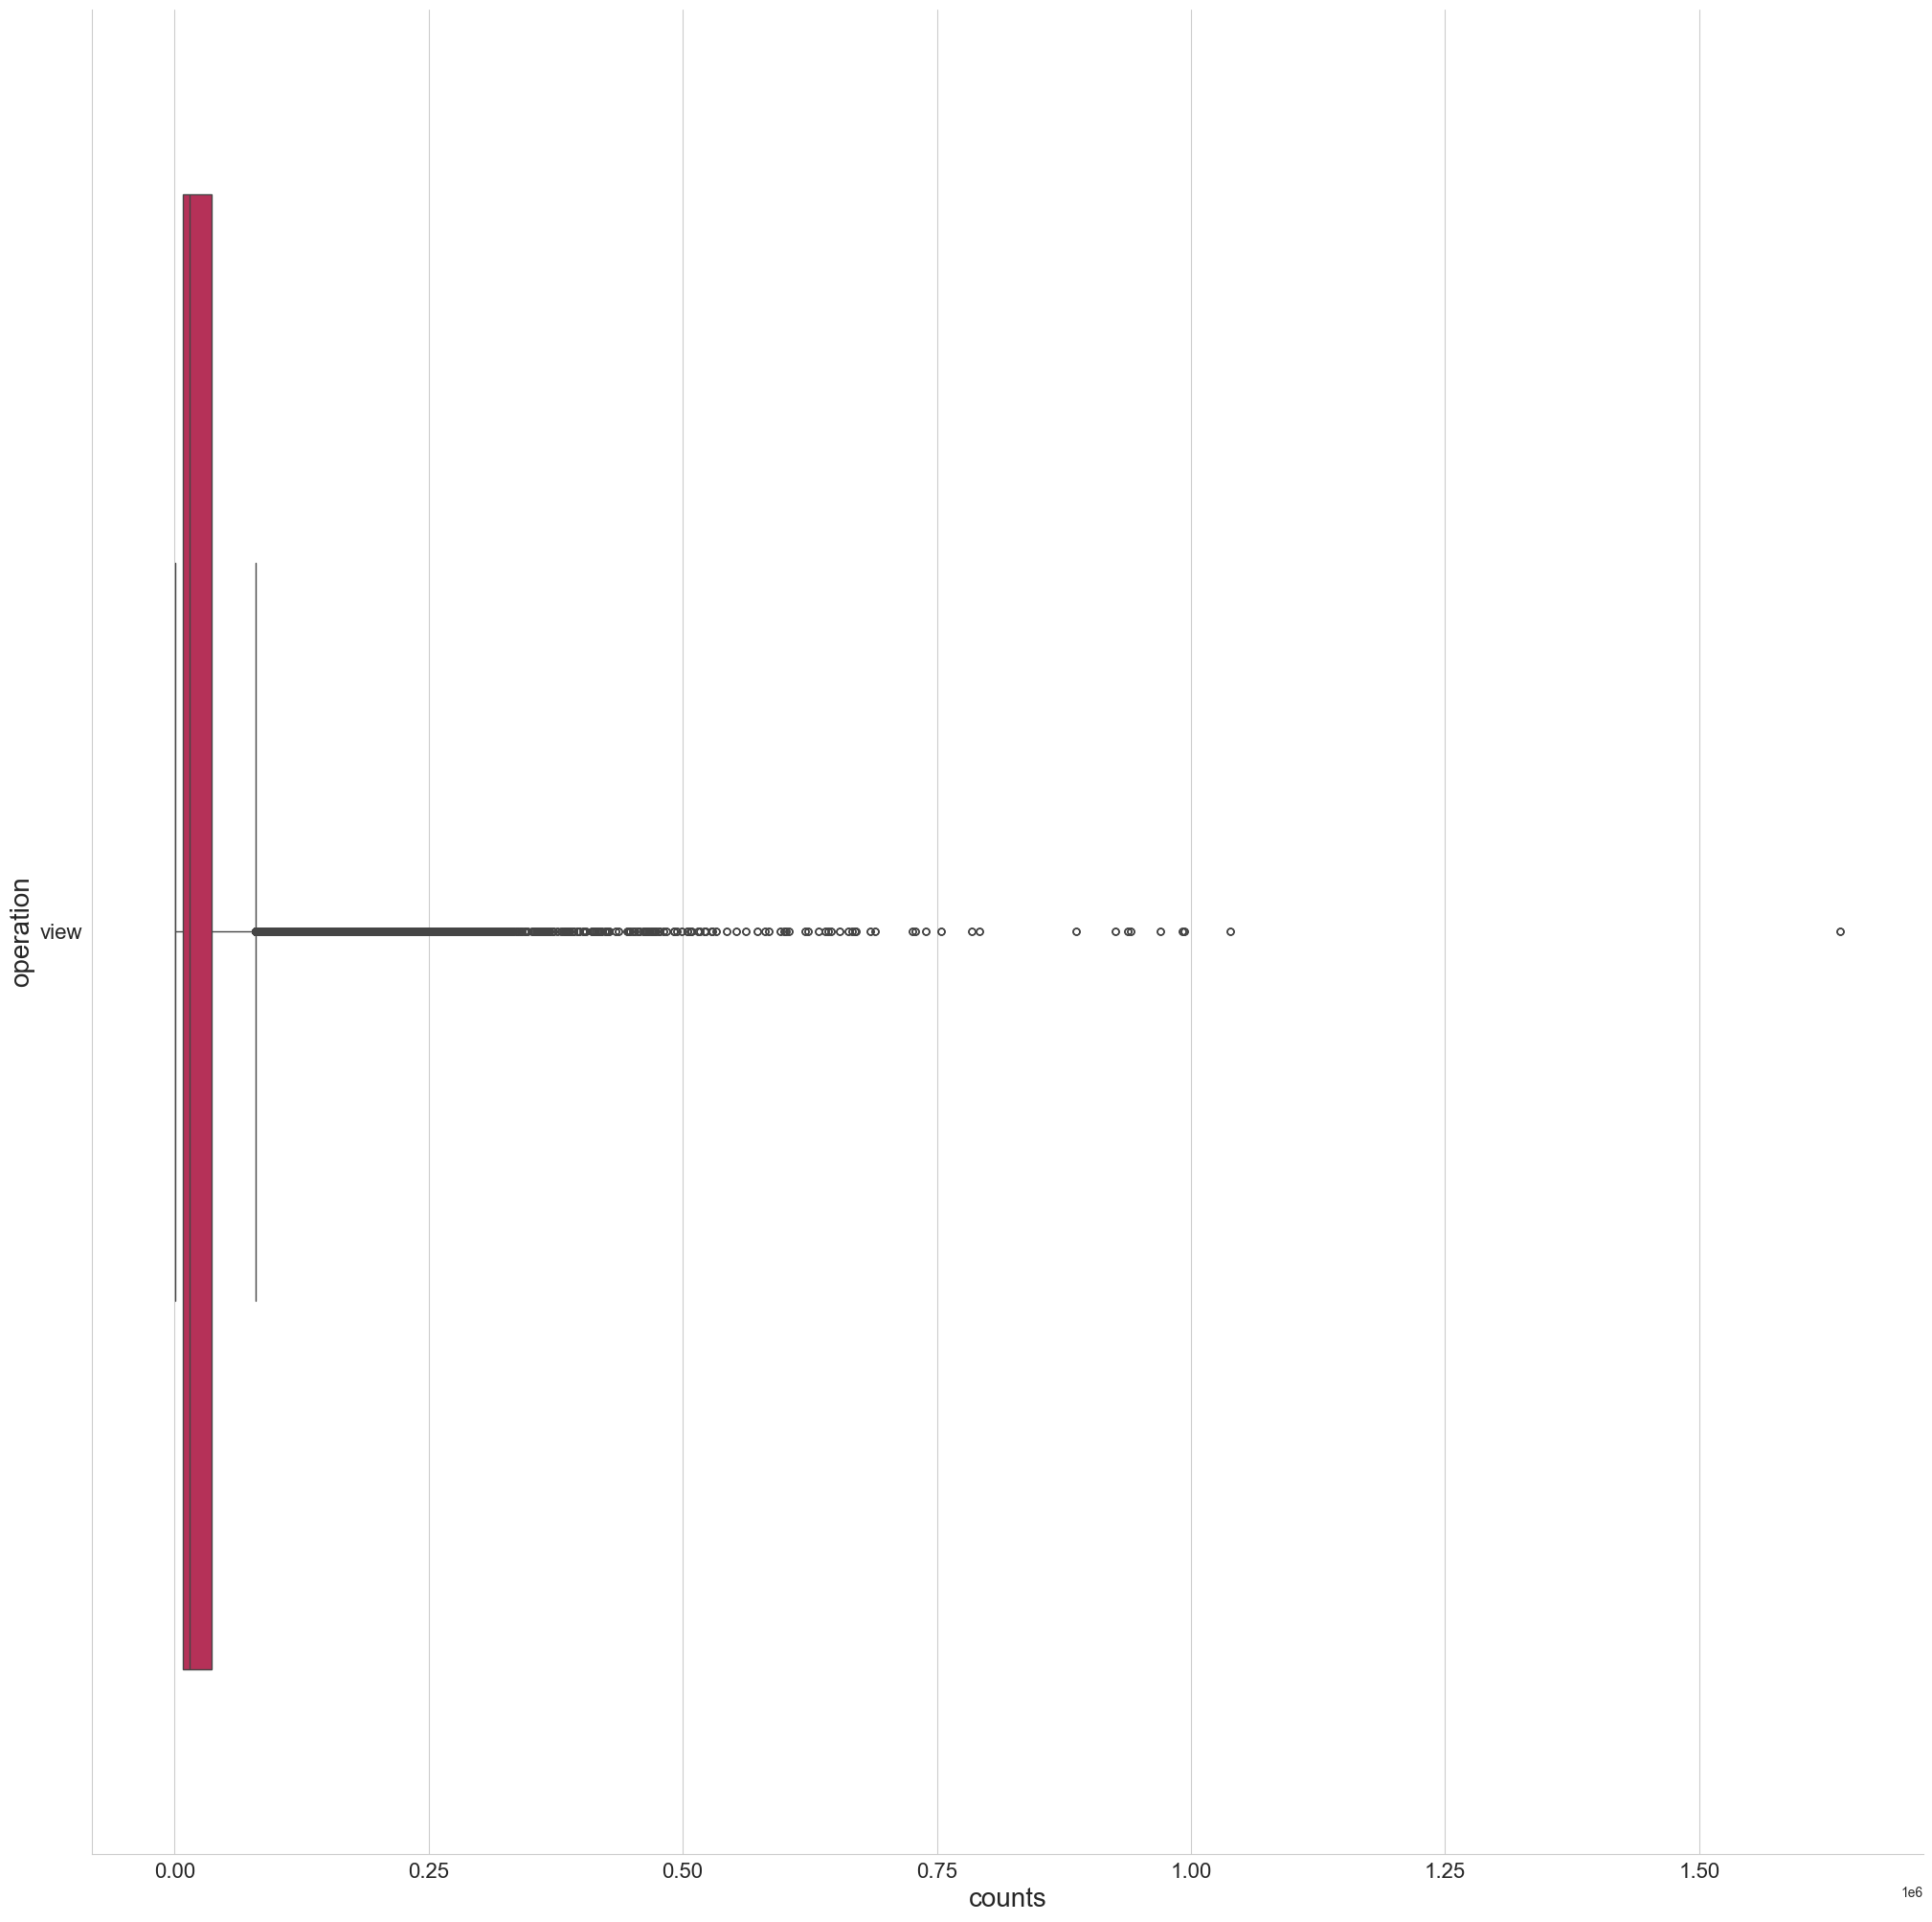

In [74]:
sns.set_style("whitegrid")
operations_count_box = sns.catplot(data=operation_counts, kind='box', y='operation', x='counts', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('operation', fontsize=20)
plt.xlabel('counts', fontsize=20)
plt.show()

数据缺失的处理

1.将缺失部分剔除

In [76]:
dtype_uni_miss(mov_data)

dtype                                                eg.  \
IMDb-rating      float64                                                4.8   
appropriate_for   object                                                  R   
director          object                                          John Swab   
downloads        float64                                              455.0   
id                object                                             372092   
industry          object                                Hollywood / English   
language          object                                            English   
posted_date       object                                       20 Feb, 2023   
release_date      object                                        Jan 28 2023   
run_time          object                                                105   
storyline         object  Doc\r\n facilitates a fragile truce between th...   
title             object                                       Little Dixie   
views            float64                                             4442.0   
writer            object                                          John Swab   

                 num_unique null_share  
IMDb-rating              85      4.09%  
appropriate_for          21     46.12%  
director               9672      9.43%  
downloads             10479      0.00%  
id                    17086      0.00%  
industry                 10      0.00%  
language               1167      2.66%  
posted_date            4123      0.00%  
release_date           4886      0.00%  
run_time                415      8.60%  
storyline             15748      8.28%  
title                 16572      0.00%  
views                 14747      0.00%  
writer                13603     10.67%

In [77]:
cols, nulls = [], []

for col in mov_data:
    cols.append(col)
    null = mov_data[col].isna().sum()
    nulls.append(null)
    
df = pd.DataFrame(nulls, index=cols, columns=['num_null']).T
df

IMDb-rating  appropriate_for  director  downloads  id  industry  \
num_null          841             9476      1938          1   0         1   

          language  posted_date  release_date  run_time  storyline  title  \
num_null       546            1             1      1768       1701      1   

          views  writer  
num_null      1    2192

In [78]:
mov_data_cleaned = mov_data.dropna()
mov_data_cleaned

IMDb-rating appropriate_for                   director  downloads  \
0              4.8               R                  John Swab      455.0   
1              6.4           TV-PG                Paul Ziller       73.0   
2              5.2               R               Ben Wheatley     1427.0   
7              6.5               R             Benjamin Caron     1781.0   
8              6.9           PG-13                Ravi Kapoor      458.0   
...            ...             ...                        ...        ...   
20522          7.1       Not Rated                  Biren Nag     1932.0   
20525          7.0               G               Guy Hamilton     2544.0   
20533          5.6               R  Barbara Topsøe-Rothenborg    12284.0   
20537          7.1       Not Rated                  Biren Nag     1932.0   
20540          7.0               G               Guy Hamilton     2544.0   

           id             industry                      language  \
0      372092  Hollywood / English                       English   
1      372091  Hollywood / English                       English   
2      343381  Hollywood / English                 English,Hindi   
7      371751  Hollywood / English                       English   
8      372042  Hollywood / English                       English   
...       ...                  ...                           ...   
20522   23825   Bollywood / Indian                         Hindi   
20525   25548  Hollywood / English  English,German,Polish,French   
20533    1173  Hollywood / English        Spanish,German,English   
20537   23825   Bollywood / Indian                         Hindi   
20540   25548  Hollywood / English  English,German,Polish,French   

        posted_date release_date  run_time  \
0      20 Feb, 2023  Jan 28 2023       105   
1      20 Feb, 2023  Feb 05 2023        84   
2      20 Apr, 2021  Jun 18 2021  1h 47min   
7      13 Feb, 2023  Feb 17 2023       116   
8      18 Feb, 2023  Dec 02 2022        80   
...             ...          ...       ...   
20522  01 Jan, 1970  May 11 1962       158   
20525  01 Jan, 1970  Sep 17 1969       132   
20533  26 May, 2016  Jan 01 1970        90   
20537  01 Jan, 1970  May 11 1962       158   
20540  01 Jan, 1970  Sep 17 1969       132   

                                               storyline  \
0      Doc\r\n facilitates a fragile truce between th...   
1      Caterer\r\n Goldy Berry reunites with detectiv...   
2      As the world searches for a cure to a disastro...   
7      Motivations are suspect, and expectations are ...   
8      An\r\n unmotivated South Asian American rapper...   
...                                                  ...   
20522  After a lusty Thakur rapes a young girl, she k...   
20525  Historical reenactment of the air war in the e...   
20533  LOVE AT FIRST HICCUP is a charming, innocent, ...   
20537  After a lusty Thakur rapes a young girl, she k...   
20540  Historical reenactment of the air war in the e...   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
7                                         Sharper  18225.0   
8                                    Four Samosas   6912.0   
...                                           ...      ...   
20522                              Bees Saal Baad   6077.0   
20525                           Battle of Britain   9320.0   
20533                        Love at First Hiccup  36022.0   
20537                              Bees Saal Baad   6077.0   
20540                           Battle of Britain   9320.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
7                     

2.用最高频率值来填补缺失值

In [81]:
import copy
HF = {}
mov_data_HF_replaced = copy.deepcopy(mov_data)
for col in mov_data_HF_replaced:
    HF[col] = mov_data_HF_replaced[col].value_counts().index[0]
HF['language'] = 'English'

HF

{'IMDb-rating': 6.6,
 'appropriate_for': 'R',
 'director': 'Venky Atluri',
 'downloads': 767.0,
 'id': '372090',
 'industry': 'Hollywood / English',
 'language': 'English',
 'posted_date': '13 Feb, 2023',
 'release_date': 'Jan 01 1970',
 'run_time': '93',
 'storyline': 'The life of a young man and his struggles against the privatization of education.',
 'title': 'The Girl Who Escaped: The Kara Robinson Story',
 'views': 7891.0,
 'writer': 'Nicholas Schutt'}

In [82]:
for col in mov_data_HF_replaced:
    mov_data_HF_replaced[col] = mov_data_HF_replaced[col].replace(NA, HF[col])
mov_data_HF_replaced.isna().sum()

IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

In [83]:
mov_data_HF_replaced['appropriate_for'].value_counts()

appropriate_for
R                 13860
Not Rated          2142
PG-13              1968
PG                  886
TV-14               694
TV-MA               406
G                   152
Unrated             132
TV-PG               115
TV-G                 99
TV-Y7                45
TV-Y                 25
Approved              9
NC-17                 4
TV-Y7-FV              3
Passed                3
MA-17                 1
TV-13                 1
Drama                 1
Drama, Romance        1
18+                   1
Name: count, dtype: int64

In [88]:
appropriate_count = pd.DataFrame(mov_data['appropriate_for'].value_counts()).rename(columns={'count': 'appropriate_count'}).sort_values(by='appropriate_count', ascending=True)
appropriate_count

appropriate_count
appropriate_for                   
18+                              1
Drama                            1
TV-13                            1
MA-17                            1
Drama, Romance                   1
Passed                           3
TV-Y7-FV                         3
NC-17                            4
Approved                         9
TV-Y                            25
TV-Y7                           45
TV-G                            99
TV-PG                          115
Unrated                        132
G                              152
TV-MA                          406
TV-14                          694
PG                             886
PG-13                         1968
Not Rated                     2142
R                             4384

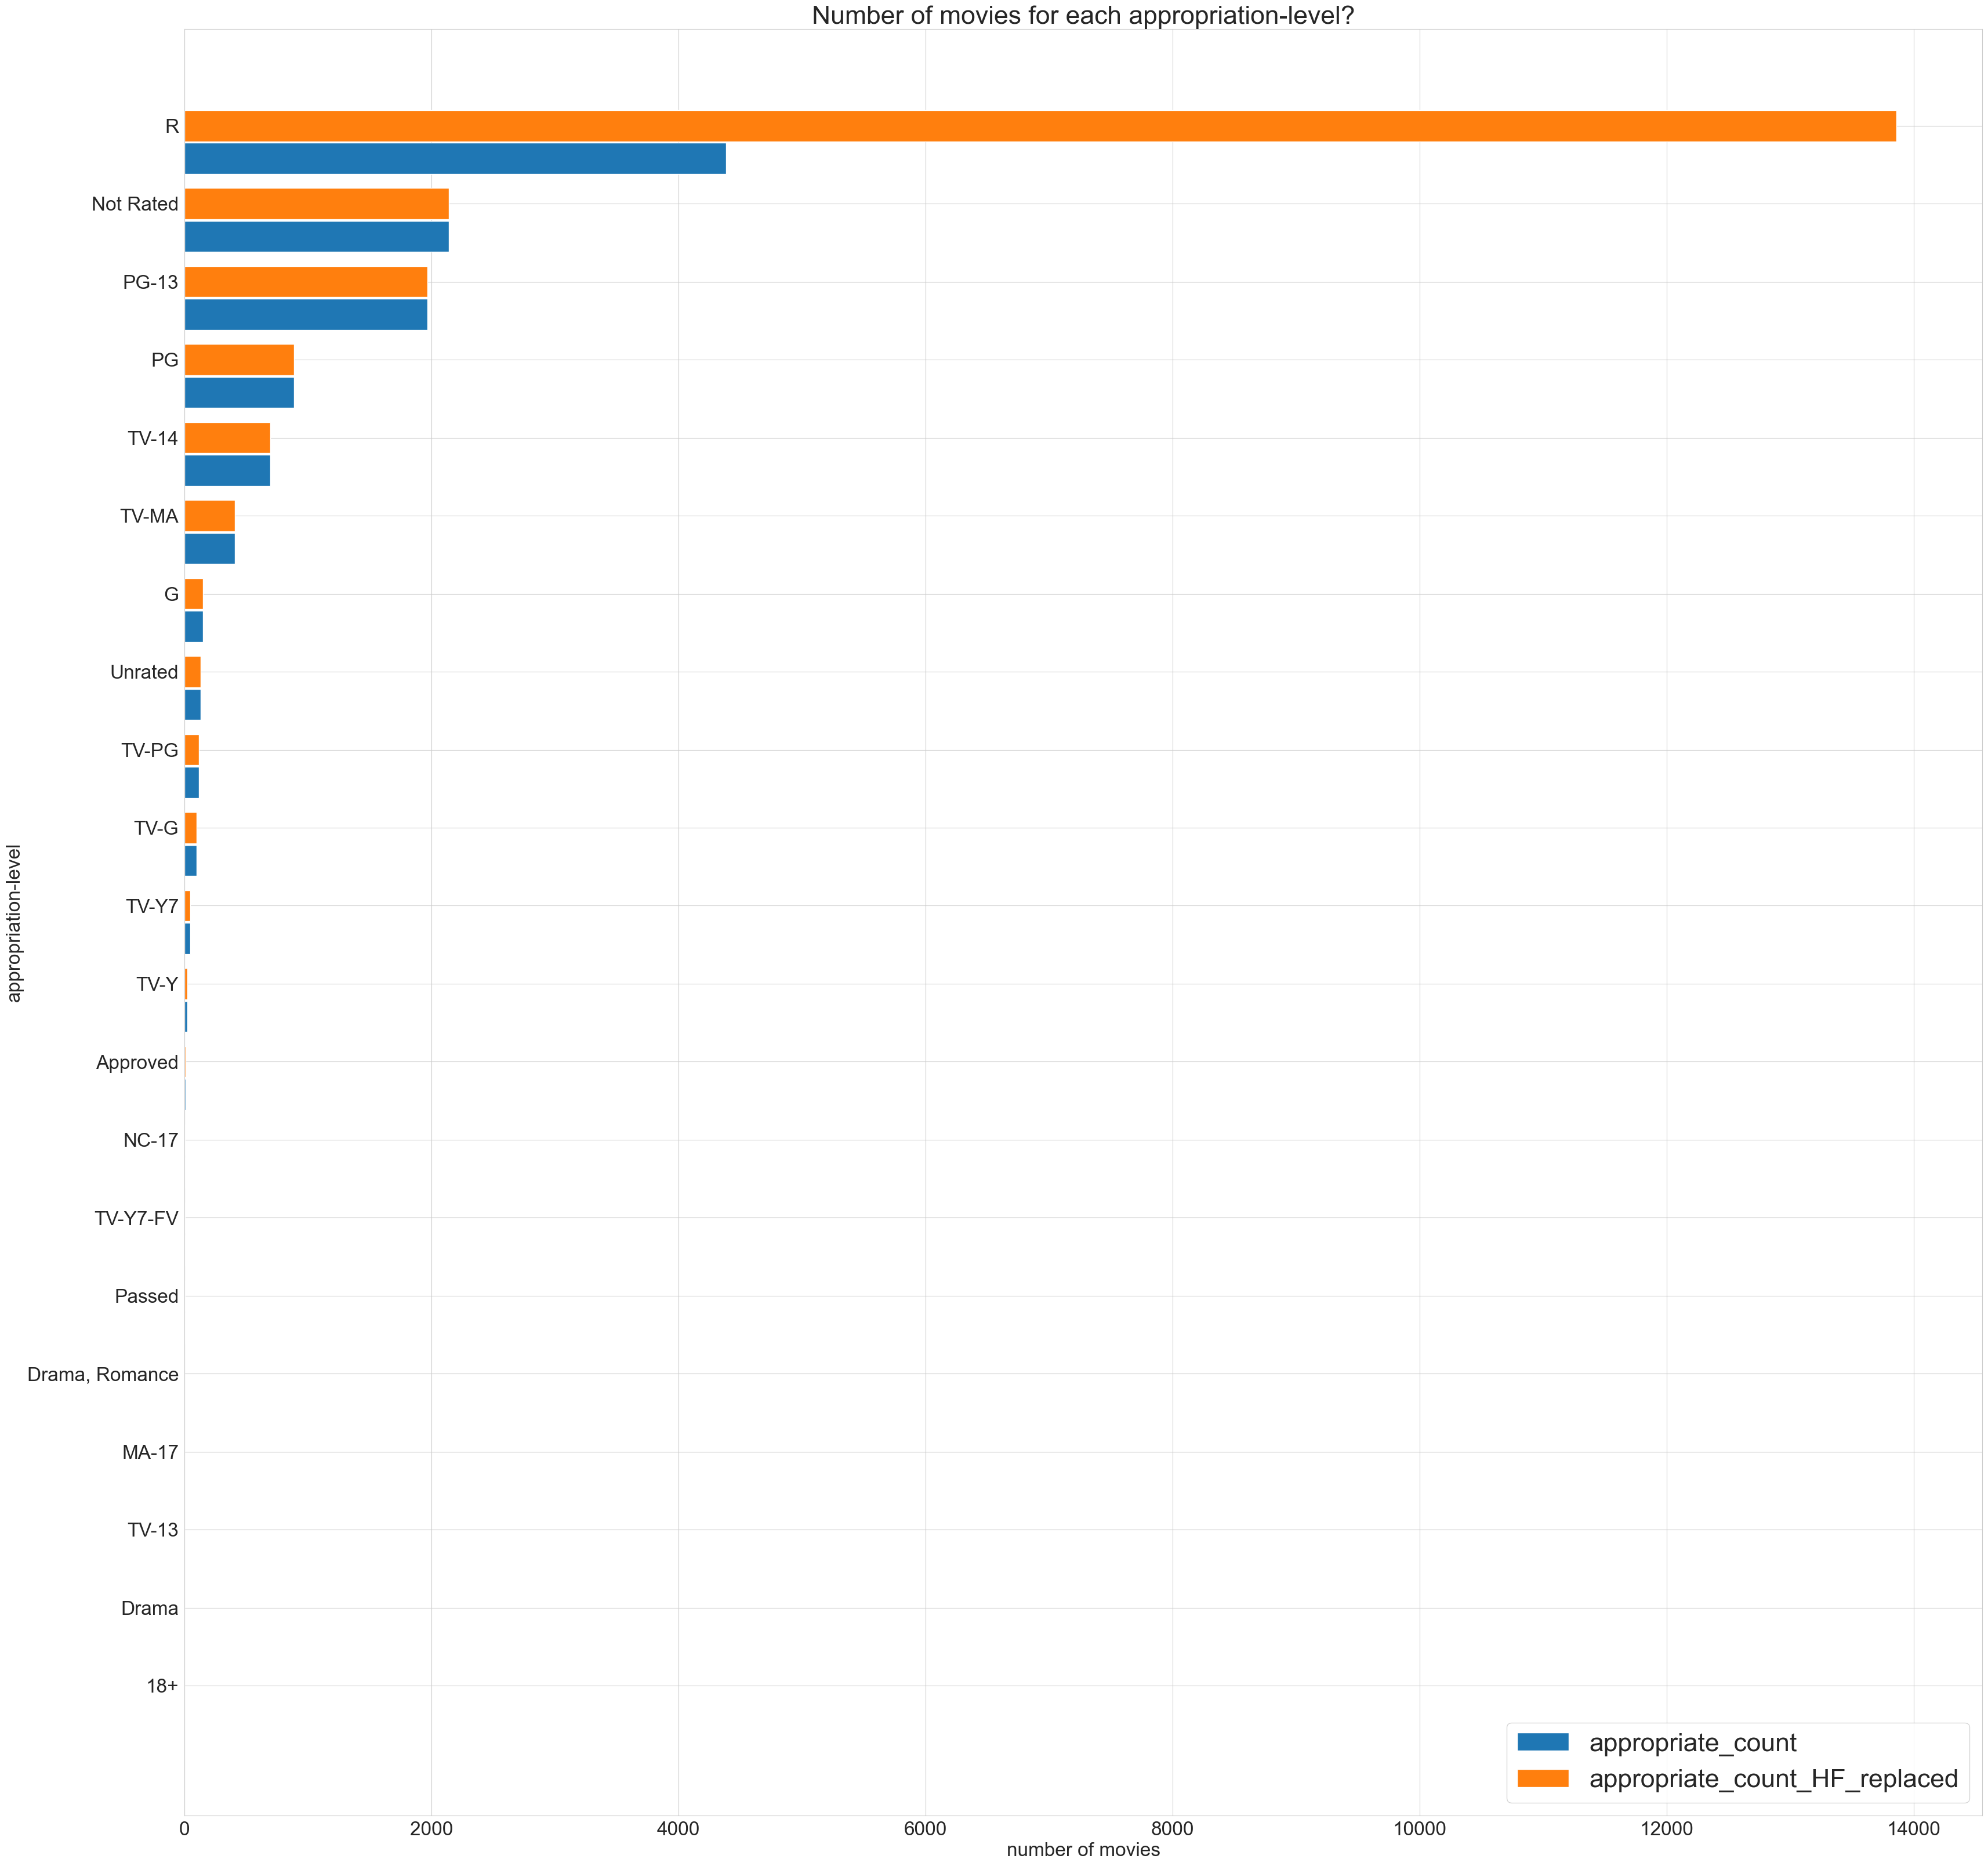

In [89]:
appropriate_count_HF_replaced = appropriate_count
appropriate_count_HF_replaced['appropriate_count_HF_replaced'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_HF_replaced['appropriate_for'].value_counts().index):
        appropriate_count_HF_replaced.loc[[level], ['appropriate_count_HF_replaced']] = mov_data_HF_replaced['appropriate_for'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(appropriate_count_HF_replaced))), tick_label=appropriate_count_HF_replaced.index, width=appropriate_count_HF_replaced['appropriate_count'], label='appropriate_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(appropriate_count_HF_replaced)))], tick_label=appropriate_count_HF_replaced.index, width=appropriate_count_HF_replaced['appropriate_count_HF_replaced'], label='appropriate_count_HF_replaced', height=0.4)
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

3.通过属性的相关关系来填补缺失值

In [90]:
mov_data_attr_corr = copy.deepcopy(mov_data)
df_coded = pd.get_dummies(mov_data_attr_corr, columns=['appropriate_for'], dummy_na=True, drop_first=True)
df_coded.head()

IMDb-rating      director  downloads      id             industry  \
0          4.8     John Swab      455.0  372092  Hollywood / English   
1          6.4   Paul Ziller       73.0  372091  Hollywood / English   
2          5.2  Ben Wheatley     1427.0  343381  Hollywood / English   
3          8.1  Venky Atluri     2379.0  372090            Tollywood   
4          4.6  Shaji Kailas      657.0  372089            Tollywood   

        language   posted_date release_date  run_time  \
0        English  20 Feb, 2023  Jan 28 2023       105   
1        English  20 Feb, 2023  Feb 05 2023        84   
2  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
3          Hindi  20 Feb, 2023  Feb 17 2023       139   
4          Hindi  20 Feb, 2023  Jan 26 2023       122   

                                           storyline  ...  \
0  Doc\r\n facilitates a fragile truce between th...  ...   
1  Caterer\r\n Goldy Berry reunites with detectiv...  ...   
2  As the world searches for a cure to a disastro...  ...   
3  The life of a young man and his struggles agai...  ...   
4  A man named Kalidas gets stranded due to the p...  ...   

  appropriate_for_TV-13  appropriate_for_TV-14 appropriate_for_TV-G  \
0                 False                  False                False   
1                 False                  False                False   
2                 False                  False                False   
3                 False                  False                False   
4                 False                  False                False   

   appropriate_for_TV-MA  appropriate_for_TV-PG  appropriate_for_TV-Y  \
0                  False                  False                 False   
1                  False                   True                 False   
2                  False                  False                 False   
3                  False                  False                 False   
4                  False                  False                 False   

   appropriate_for_TV-Y7  appropriate_for_TV-Y7-FV  appropriate_for_Unrated  \
0                  False                     False                    False   
1                  False                     False                    False   
2                  False                     False                    False   
3                  False                     False                    False   
4                  False                     False                    False   

   appropriate_for_nan  
0                False  
1                False  
2                False  
3                 True  
4                 True  

[5 rows x 34 columns]

C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\3899186937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  level_views_box = sns.catplot(data=mov_data, kind='box', y='appropriate_for', x='IMDb-rating', height=20, palette='rocket')


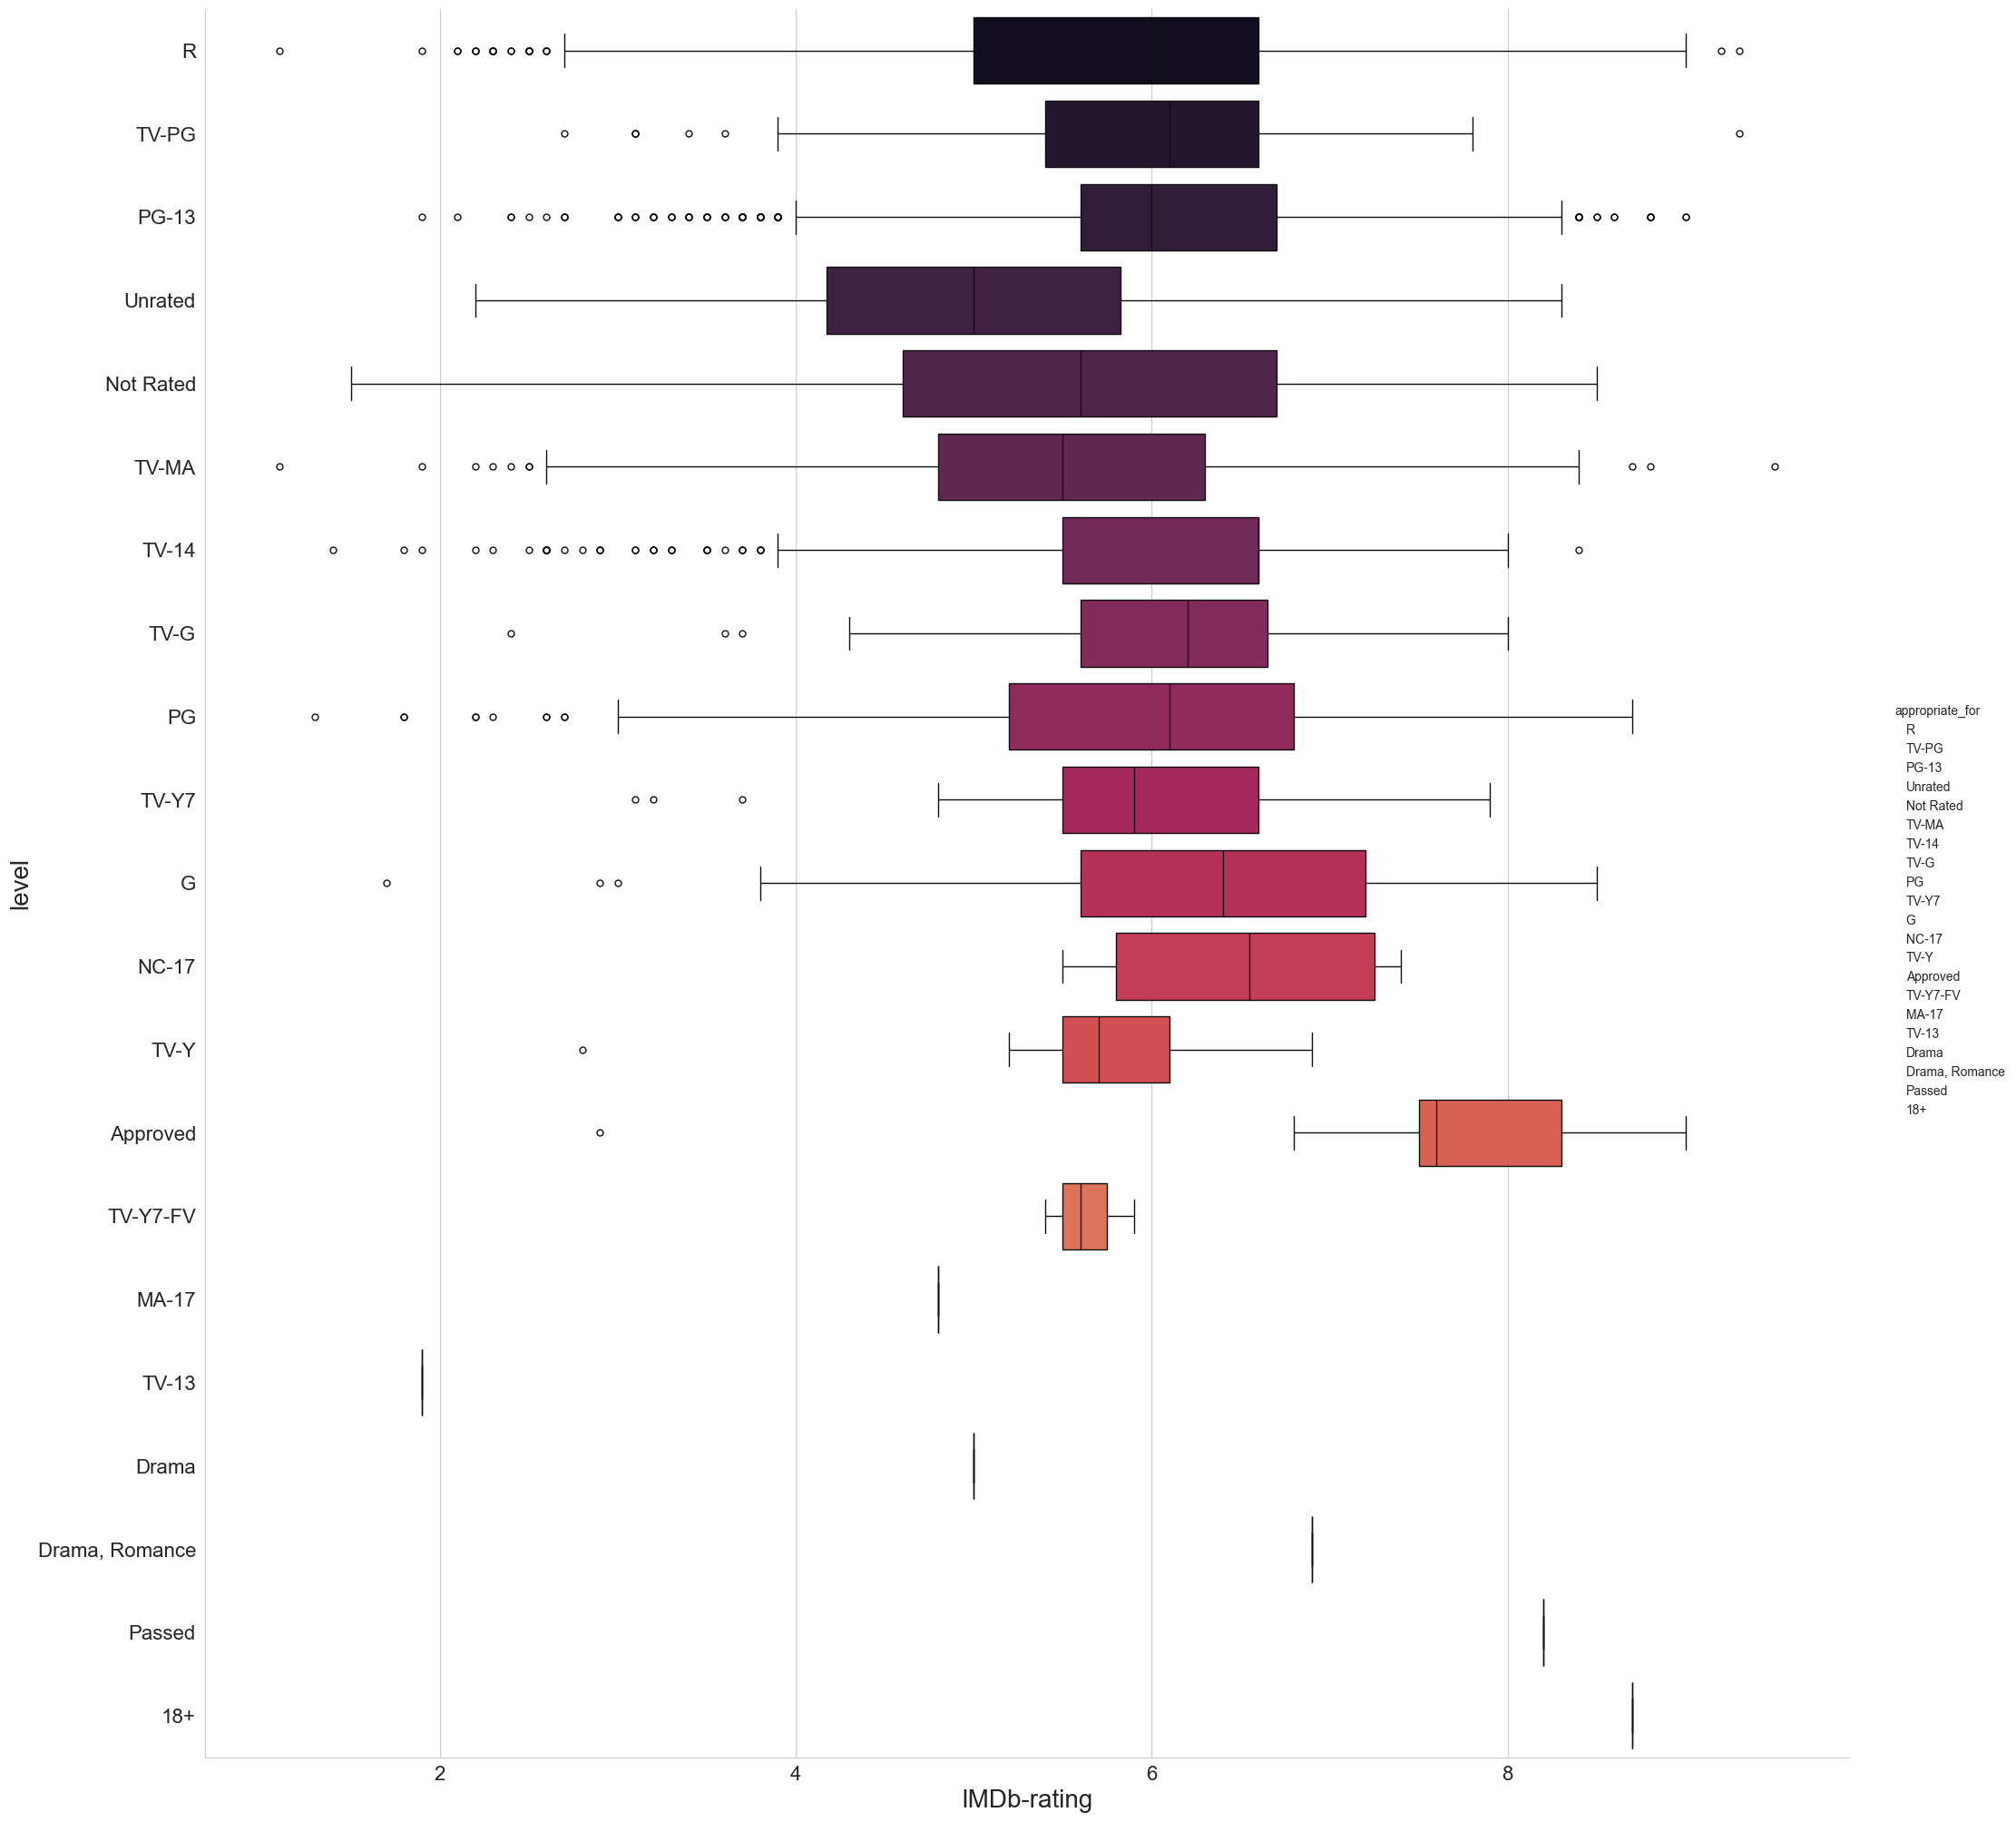

In [93]:
sns.set_style("whitegrid")
level_views_box = sns.catplot(data=mov_data, kind='box', y='appropriate_for', x='IMDb-rating', height=20, palette='rocket')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('level', fontsize=20, )
plt.xlabel('IMDb-rating', fontsize=20)
plt.show()

In [94]:
df1 = mov_data_attr_corr.groupby('appropriate_for').agg(avg=('IMDb-rating', 'mean'))
df1

avg
appropriate_for          
18+              8.700000
Approved         7.411111
Drama            5.000000
Drama, Romance   6.900000
G                6.336842
MA-17            4.800000
NC-17            6.500000
Not Rated        5.592997
PG               5.974179
PG-13            6.077863
Passed           8.200000
R                5.805686
TV-13            1.900000
TV-14            6.023775
TV-G             6.076768
TV-MA            5.477833
TV-PG            5.922807
TV-Y             5.708000
TV-Y7            5.964444
TV-Y7-FV         5.633333
Unrated          5.002273

In [95]:
mov_data_attr_corr

IMDb-rating appropriate_for      director  downloads      id  \
0              4.8               R     John Swab      455.0  372092   
1              6.4           TV-PG   Paul Ziller       73.0  372091   
2              5.2               R  Ben Wheatley     1427.0  343381   
3              8.1             NaN  Venky Atluri     2379.0  372090   
4              4.6             NaN  Shaji Kailas      657.0  372089   
...            ...             ...           ...        ...     ...   
20543          NaN             NaN           NaN     1998.0   28957   
20544          7.7             NaN     Bimal Roy     6080.0   28958   
20545          8.0             NaN           NaN     3276.0   30459   
20546          NaN             NaN           NaN      309.0  371669   
20547          NaN             NaN           NaN     2613.0  371816   

                  industry       language   posted_date release_date  \
0      Hollywood / English        English  20 Feb, 2023  Jan 28 2023   
1      Hollywood / English        English  20 Feb, 2023  Feb 05 2023   
2      Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021   
3                Tollywood          Hindi  20 Feb, 2023  Feb 17 2023   
4                Tollywood          Hindi  20 Feb, 2023  Jan 26 2023   
...                    ...            ...           ...          ...   
20543   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 13 1959   
20544   Bollywood / Indian          Hindi  01 Jan, 1970  May 13 1955   
20545   Bollywood / Indian          Hindi  01 Jan, 1970  Mar 28 1958   
20546            Wrestling        English  10 Feb, 2023  Feb 09 2023   
20547            Wrestling        English  14 Feb, 2023  Feb 13 2023   

       run_time                                          storyline  \
0           105  Doc\r\n facilitates a fragile truce between th...   
1            84  Caterer\r\n Goldy Berry reunites with detectiv...   
2      1h 47min  As the world searches for a cure to a disastro...   
3           139  The life of a young man and his struggles agai...   
4           122  A man named Kalidas gets stranded due to the p...   
...         ...                                                ...   
20543       NaN                                                NaN   
20544       159  Devdas and Parvati had been inseparable as chi...   
20545  1h 50min  While driving his car on a rainy night, Anand'...   
20546       NaN                                                NaN   
20547       NaN                                                NaN   

                                            title    views  \
0                                    Little Dixie   4442.0   
1      Grilling Season: A Curious Caterer Mystery   1002.0   
2                                    In the Earth  14419.0   
3                                          Vaathi   7891.0   
4                                           Alone   2438.0   
...                                           ...      ...   
20543                                  Bhai-Bahen   6219.0   
20544                                      Devdas  16376.0   
20545                                   Madhumati   7220.0   
20546                       TNA.Impact 2023-02-09   1419.0   
20547                          WWE Raw 2023-02-13   6697.0   

                                                  writer  
0                                              John Swab  
1                                 John Christian Plummer  
2                                           Ben Wheatley  
3                                           Venky Atluri  
4                                       Rajesh Jayaraman  
...                                                  ...  
20543                                                NaN  
20544  Rajinder Singh Bedi, Saratchandra Chatterjee, ...  
20545                                                NaN  
20546                                                NaN  
20547                                                N

In [96]:
mov_data_attr_corr = mov_data
for i in range(len(mov_data_attr_corr)):
    if mov_data_attr_corr['appropriate_for'].iloc[i] is NA:
        rate = mov_data_attr_corr['IMDb-rating'].iloc[i]
        dist = []
        for j in range(len(df1)):
            dist.append(abs(df1.iloc[j]['avg']-rate))
        idx = dist.index(min(dist))
        mov_data_attr_corr['appropriate_for'].iloc[i] = df1.index[idx]
mov_data_attr_corr['appropriate_for'].value_counts()

C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\320534558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data_attr_corr['appropriate_for'].iloc[i] = df1.index[idx]
C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\320534558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_data_attr_corr['appropriate_for'].iloc[i] = df1.index[idx]
C:\Users\Superstar\AppData\Local\Temp\ipykernel_19756\320534558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

appropriate_for
R                 4579
Not Rated         2357
PG-13             2355
MA-17             2181
18+               1468
TV-MA             1266
PG                 886
TV-14              880
Drama              753
Unrated            533
Passed             523
G                  484
Drama, Romance     479
TV-13              453
Approved           400
TV-PG              316
NC-17              257
TV-Y               231
TV-G                99
TV-Y7               45
TV-Y7-FV             3
Name: count, dtype: int64

In [97]:
appropriate_count_attr_corr = appropriate_count
appropriate_count_attr_corr['appropriate_count_attr_corr'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_attr_corr['appropriate_for'].value_counts().index):
        appropriate_count_attr_corr.loc[[level], ['appropriate_count_attr_corr']] = mov_data_attr_corr['appropriate_for'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(appropriate_count_attr_corr))), tick_label=appropriate_count_attr_corr.index, width=appropriate_count_attr_corr['appropriate_count'], label='appropriate_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(appropriate_count_attr_corr)))], tick_label=appropriate_count_attr_corr.index, width=appropriate_count_attr_corr['appropriate_count_attr_corr'], label='appropriate_count_attr_corr', height=0.4)
plt.ylabel('appropriation-level', fontsize=24)
plt.xlabel('number of movies', fontsize=24)
plt.title('Number of movies for each appropriation-level?', fontsize=32, loc='center')
plt.legend(fontsize=32, loc='lower right')
plt.show()

4.通过数据对象之间的相似性来填补缺失值

In [98]:
mov_data_sample_corr = copy.deepcopy(mov_data)

In [99]:
def regularit(df):
    new_df = pd.DataFrame(index=df.index)
    columns = ['IMDb-rating', 'downloads', 'views']
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        new_df[c] = ((d - MIN) / (d - MAX))
    return new_df
normal_mov_data = regularit(mov_data)
normal_mov_data

IMDb-rating  downloads     views
0        -0.725490  -0.001164 -0.002310
1        -1.514286  -0.000187 -0.000205
2        -0.872340  -0.003660 -0.008467
3        -3.888889  -0.006117 -0.004430
4        -0.660377  -0.001682 -0.001082
...            ...        ...       ...
20543          NaN  -0.005133 -0.003401
20544    -3.000000  -0.015784 -0.009684
20545    -3.631579  -0.008443 -0.004017
20546          NaN  -0.000790 -0.000459
20547          NaN  -0.006723 -0.003695

[20548 rows x 3 columns]

In [100]:
normal_appropriate = pd.concat([normal_mov_data, mov_data['appropriate_for']], axis=1)
normal_appropriate

IMDb-rating  downloads     views appropriate_for
0        -0.725490  -0.001164 -0.002310               R
1        -1.514286  -0.000187 -0.000205           TV-PG
2        -0.872340  -0.003660 -0.008467               R
3        -3.888889  -0.006117 -0.004430          Passed
4        -0.660377  -0.001682 -0.001082           MA-17
...            ...        ...       ...             ...
20543          NaN  -0.005133 -0.003401             18+
20544    -3.000000  -0.015784 -0.009684        Approved
20545    -3.631579  -0.008443 -0.004017          Passed
20546          NaN  -0.000790 -0.000459             18+
20547          NaN  -0.006723 -0.003695             18+

[20548 rows x 4 columns]

In [101]:
infos = []
for i in range(len(normal_appropriate)):
    info = []
    rate = normal_appropriate['IMDb-rating'].iloc[i]
    download = normal_appropriate['downloads'].iloc[i]
    view = normal_appropriate['views'].iloc[i]
    info.append(rate)
    info.append(download)
    info.append(view)
    infos.append(info)

In [102]:
for i in range(len(normal_appropriate)):
    if normal_appropriate['appropriate_for'].iloc[i] is NA:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        mov_data_sample_corr['appropriate_for'].iloc[i] = mov_data_sample_corr['appropriate_for'].iloc[idx]
mov_data_sample_corr['appropriate_for'].value_counts()

appropriate_for
R                 4579
Not Rated         2357
PG-13             2355
MA-17             2181
18+               1468
TV-MA             1266
PG                 886
TV-14              880
Drama              753
Unrated            533
Passed             523
G                  484
Drama, Romance     479
TV-13              453
Approved           400
TV-PG              316
NC-17              257
TV-Y               231
TV-G                99
TV-Y7               45
TV-Y7-FV             3
Name: count, dtype: int64